In [2]:
!pip install nbformat # 설치 시도
!pip install -U nbformat # 기설치시, update

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [5]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\user\AppData\Local\Temp/ipykernel_27816/2578555594.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


# 지상파 시청률 2020

In [6]:
df_ground_2020 = pd.read_csv('닐슨_일간순위_2020.csv', sep=',', encoding='UTF-8')
df_ground_2020

,프로그램명,시점,시청률/시청자수
0,일일연속극(꽃길만걸어요),202011,17.7
1,백종원의골목식당,202011,13.7
2,일일드라마(우아한모녀),202011,12.2
3,수목미니시리즈(99억의여자),202011,11.6
4,다큐3일<재>,202011,11.2
...,...,...,...
14595,아침마당,20201231,651
14596,코로나19통합뉴스룸,20201231,636
14597,2020SBS연기대상1부,20201231,617
14598,2020KBS영상실록국제편,20201231,571


In [7]:
df_ground_2020_percent = pd.DataFrame()

i=1
j=20
while True:
    percent = df_ground_2020[i-1:j]
    df_ground_2020_percent = df_ground_2020_percent.append(percent)
    i = i+40
    j = j+40
    if j >= 14600:
        break
    
df_ground_2020_percent

,프로그램명,시점,시청률/시청자수
0,일일연속극(꽃길만걸어요),202011,17.7
1,백종원의골목식당,202011,13.7
2,일일드라마(우아한모녀),202011,12.2
3,수목미니시리즈(99억의여자),202011,11.6
4,다큐3일<재>,202011,11.2
...,...,...,...
14575,2020MBC가요대제전THEMOMENT1부,20201231,5.8
14576,2020SBS연기대상2부,20201231,5.7
14577,KBS뉴스12,20201231,5.5
14578,코로나19통합뉴스룸,20201231,5.4


In [8]:
df_ground_2020_count = pd.DataFrame()

i=20
j=40
while True:
    count = df_ground_2020[i:j]
    df_ground_2020_count = df_ground_2020_count.append(count)
    i = i+40
    j = j+40
    if j > 14600:
        break
    
df_ground_2020_count

,프로그램명,시점,시청률/시청자수
20,일일연속극(꽃길만걸어요),202011,"1,789"
21,백종원의골목식당,202011,"1,509"
22,백종원의골목식당,202011,"1,257"
23,수목미니시리즈(99억의여자),202011,"1,187"
24,다큐3일<재>,202011,"1,154"
...,...,...,...
14595,아침마당,20201231,651
14596,코로나19통합뉴스룸,20201231,636
14597,2020SBS연기대상1부,20201231,617
14598,2020KBS영상실록국제편,20201231,571


In [9]:
df_ground_2020_percent = df_ground_2020_percent.reset_index(drop=True)
df_ground_2020_percent = df_ground_2020_percent.rename(columns={'시청률/시청자수':'시청률'})

df_ground_2020_count = df_ground_2020_count.reset_index(drop=True)
df_ground_2020_count = df_ground_2020_count.rename(columns={'시청률/시청자수':'시청자수'})

In [10]:
df_ground_2020_percent

,프로그램명,시점,시청률
0,일일연속극(꽃길만걸어요),202011,17.7
1,백종원의골목식당,202011,13.7
2,일일드라마(우아한모녀),202011,12.2
3,수목미니시리즈(99억의여자),202011,11.6
4,다큐3일<재>,202011,11.2
...,...,...,...
7295,2020MBC가요대제전THEMOMENT1부,20201231,5.8
7296,2020SBS연기대상2부,20201231,5.7
7297,KBS뉴스12,20201231,5.5
7298,코로나19통합뉴스룸,20201231,5.4


In [11]:
# 시청률 DataFrame에서 '드라마' 포함된 행
df_ground_2020_percent_drama = df_ground_2020_percent[df_ground_2020_percent['프로그램명'].str.contains('드라마')]
df_ground_2020_percent_drama = df_ground_2020_percent_drama.reset_index(drop=True)
df_ground_2020_percent_drama

,프로그램명,시점,시청률
0,일일드라마(우아한모녀),202011,12.2
1,일일드라마(우아한모녀),202012,12.3
2,금토드라마(스토브리그),202013,15.4
3,금토드라마(스토브리그),202013,13.1
4,일일드라마(우아한모녀),202013,12
...,...,...,...
1085,일일드라마(비밀의남자),20201230,16.9
1086,일일드라마(찬란한내인생),20201230,6.9
1087,일일드라마(누가뭐래도),20201231,19.4
1088,일일드라마(비밀의남자),20201231,15.9


In [12]:
df_ground_2020_percent_drama['프로그램명'] = df_ground_2020_percent_drama.프로그램명.str.split('(').str[1]
df_ground_2020_percent_drama['프로그램명'] = df_ground_2020_percent_drama.프로그램명.str.strip(')')
df_ground_2020_percent_drama

,프로그램명,시점,시청률
0,우아한모녀,202011,12.2
1,우아한모녀,202012,12.3
2,스토브리그,202013,15.4
3,스토브리그,202013,13.1
4,우아한모녀,202013,12
...,...,...,...
1085,비밀의남자,20201230,16.9
1086,찬란한내인생,20201230,6.9
1087,누가뭐래도,20201231,19.4
1088,비밀의남자,20201231,15.9


In [13]:
name = set(df_ground_2020_percent_drama['프로그램명'])
len(name)

27

In [14]:
df_ground_2020_percent_drama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   프로그램명   1090 non-null   object
 1   시점      1090 non-null   int64 
 2   시청률     1090 non-null   object
dtypes: int64(1), object(2)
memory usage: 25.7+ KB


In [15]:
df_ground_2020_percent_drama['시청률'] = df_ground_2020_percent_drama['시청률'].astype('float')

In [16]:
df_ground_2020_percent_group = df_ground_2020_percent_drama.groupby(['프로그램명','시점']).mean()
df_ground_2020_percent_group

시청률
프로그램명          시점            
WARINLIFE펜트하우스 2020112  10.45
               2020113  13.55
               2020119  12.50
               2020121  18.60
               2020127  19.70
...                       ...
한번다녀왔습니다       2020823  33.80
               2020829  32.85
               2020830  34.85
               2020912  31.15
               2020913  33.45

[832 rows x 1 columns]

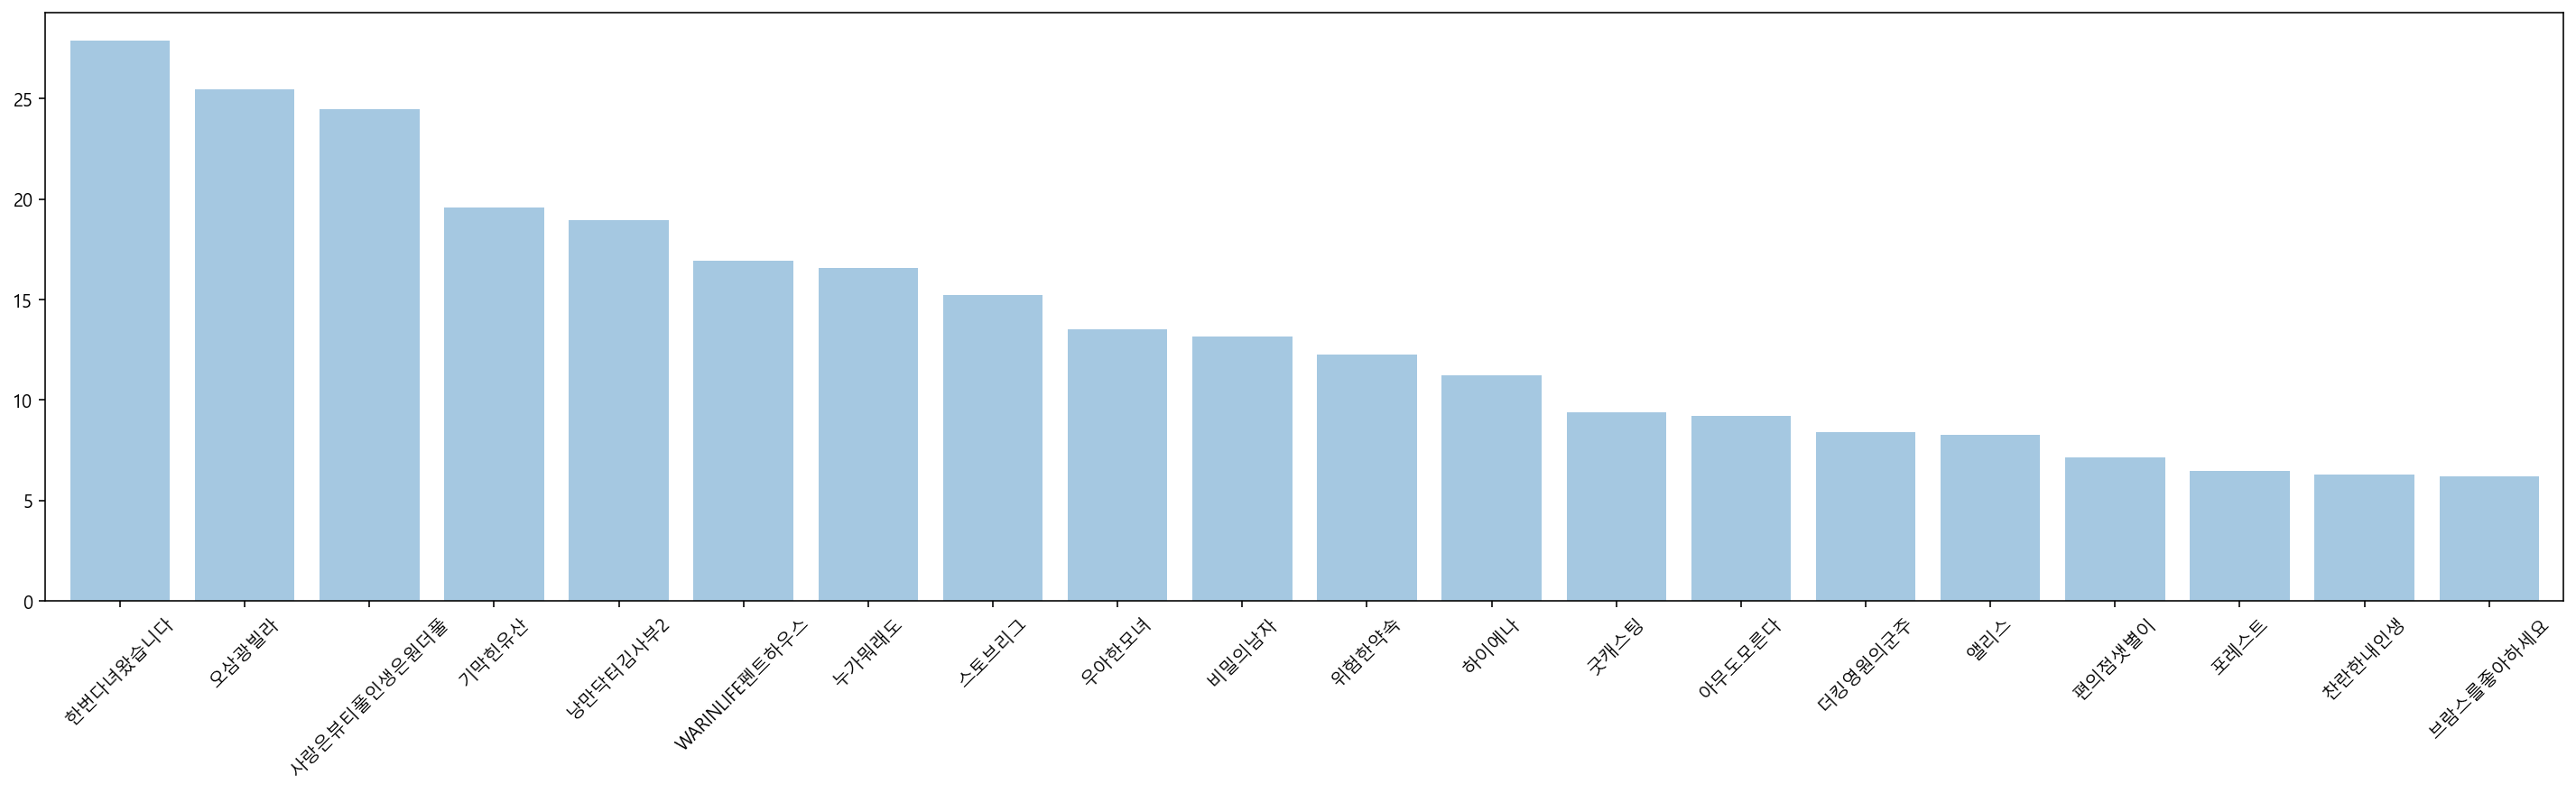

In [17]:
df_ground_2020_percent_group_sum = df_ground_2020_percent_drama['시청률'].groupby(df_ground_2020_percent_drama['프로그램명']).mean().sort_values(ascending = False)
df_ground_2020_percent_group_sum = df_ground_2020_percent_group_sum.head(20)

plt.figure(figsize=(25,6))
plt.bar(df_ground_2020_percent_group_sum.index, df_ground_2020_percent_group_sum.values, alpha=0.4)
plt.xticks(rotation=45)

ax = plt.subplot()
ax.margins(x=0.01)

plt.show()

In [112]:
df_ground_2020_percent_group_sum.head(20)

프로그램명
한번다녀왔습니다          27.906000
오삼광빌라             25.455000
사랑은뷰티풀인생은원더풀      24.491304
기막힌유산             19.572131
낭만닥터김사부2          18.963636
WARINLIFE펜트하우스    16.937500
누가뭐래도             16.591525
스토브리그             15.224138
우아한모녀             13.525806
비밀의남자             13.148684
위험한약속             12.270192
하이에나              11.213333
굿캐스팅               9.375000
아무도모른다             9.193750
더킹영원의군주            8.380645
앨리스                8.287097
편의점샛별이             7.134483
포레스트               6.490909
찬란한내인생             6.294737
브람스를좋아하세요          6.189474
Name: 시청률, dtype: float64

In [19]:
# 시청자수 DataFrame에서 '드라마' 포함된 행
df_ground_2020_count_drama = df_ground_2020_count[df_ground_2020_count['프로그램명'].str.contains('드라마')]
df_ground_2020_count_drama = df_ground_2020_count_drama.reset_index(drop=True)
df_ground_2020_count_drama

,프로그램명,시점,시청자수
0,일일드라마(우아한모녀),202011,"1,147"
1,일일드라마(우아한모녀),202012,"1,116"
2,금토드라마(스토브리그),202013,"1,789"
3,금토드라마(스토브리그),202013,"1,485"
4,일일드라마(우아한모녀),202013,"1,147"
...,...,...,...
1093,일일드라마(비밀의남자),20201230,"1,600"
1094,일일드라마(찬란한내인생),20201230,648
1095,일일드라마(누가뭐래도),20201231,"1,939"
1096,일일드라마(비밀의남자),20201231,"1,421"


In [20]:
df_ground_2020_count_drama.isnull().sum()

프로그램명    0
시점       0
시청자수     0
dtype: int64

In [21]:
df_ground_2020_count_drama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   프로그램명   1098 non-null   object
 1   시점      1098 non-null   int64 
 2   시청자수    1098 non-null   object
dtypes: int64(1), object(2)
memory usage: 25.9+ KB


In [22]:
df_ground_2020_count_drama['프로그램명'] = df_ground_2020_count_drama.프로그램명.str.split('(').str[1]
df_ground_2020_count_drama['프로그램명'] = df_ground_2020_count_drama.프로그램명.str.strip(')')
df_ground_2020_count_drama['시청자수'] = df_ground_2020_count_drama.시청자수.str.replace(",", "")
df_ground_2020_count_drama

,프로그램명,시점,시청자수
0,우아한모녀,202011,1147
1,우아한모녀,202012,1116
2,스토브리그,202013,1789
3,스토브리그,202013,1485
4,우아한모녀,202013,1147
...,...,...,...
1093,비밀의남자,20201230,1600
1094,찬란한내인생,20201230,648
1095,누가뭐래도,20201231,1939
1096,비밀의남자,20201231,1421


In [23]:
df_ground_2020_count_drama['시청자수'] = df_ground_2020_count_drama['시청자수'].astype('int')
df_ground_2020_count_drama

,프로그램명,시점,시청자수
0,우아한모녀,202011,1147
1,우아한모녀,202012,1116
2,스토브리그,202013,1789
3,스토브리그,202013,1485
4,우아한모녀,202013,1147
...,...,...,...
1093,비밀의남자,20201230,1600
1094,찬란한내인생,20201230,648
1095,누가뭐래도,20201231,1939
1096,비밀의남자,20201231,1421


In [24]:
df_ground_2020_count_group = df_ground_2020_count_drama.groupby(['프로그램명','시점']).mean()
df_ground_2020_count_group

시청자수
프로그램명          시점             
WARINLIFE펜트하우스 2020112  1076.5
               2020113  1503.5
               2020119  1302.0
               2020121  1993.0
               2020127  2022.0
...                        ...
한번다녀왔습니다       2020823  3616.0
               2020829  3597.5
               2020830  3784.5
               2020912  3467.5
               2020913  3790.0

[817 rows x 1 columns]

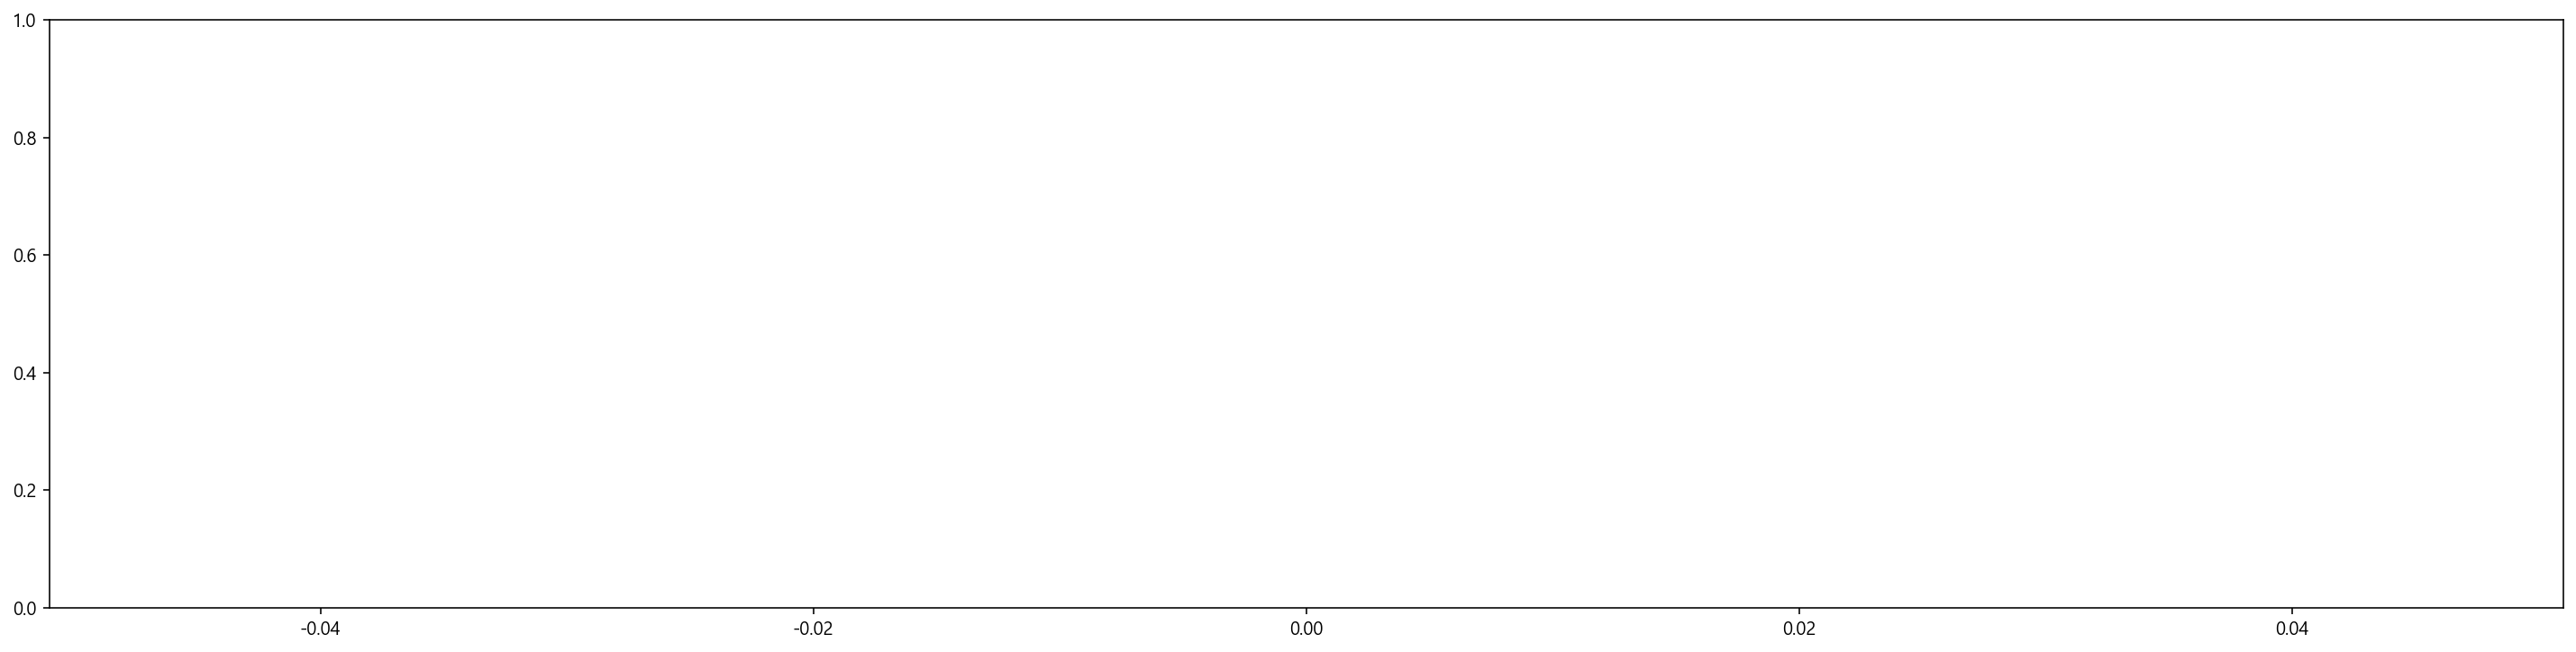

In [25]:
df_ground_2020_count_group_sum = df_ground_2020_count_drama['시청자수'].groupby(df_ground_2020_count_drama['프로그램명']).mean().sort_values(ascending = False)

plt.figure(figsize=(25,6))
plt.bar(df_ground_2020_count_group_sum.index, df_ground_2020_count_group_sum.values)
plt.xticks(rotation=45)

ax = plt.subplot(alpha=0.4)
ax.margins(x=0.01)

plt.show()

In [26]:
df_ground_2020_count_group_sum.head(20)

프로그램명
한번다녀왔습니다          2948.360000
오삼광빌라             2659.866667
사랑은뷰티풀인생은원더풀      2535.456522
낭만닥터김사부2          2207.151515
기막힌유산             1895.327869
WARINLIFE펜트하우스    1875.950000
스토브리그             1827.241379
누가뭐래도             1578.728814
하이에나              1319.833333
우아한모녀             1276.435484
비밀의남자             1232.894737
위험한약속             1114.403846
굿캐스팅              1047.750000
더킹영원의군주           1040.281250
앨리스                973.967742
아무도모른다             962.843750
편의점샛별이             856.677419
스토브리그파이널리포트2부      777.000000
날아라개천용             683.050000
포레스트               650.000000
Name: 시청자수, dtype: float64

## Top 20위 드라마 분석
1. 한번다녀왔습니다 -> X
2. 오삼광빌라 -> X
3. 사랑은뷰티풀인생은원더풀 -> X
4. 낭만닥터김사부2 -> X
5. 기막힌유산 -> X
6. WARINLIFE펜트하우스 -> X
7. 스토브리그 -> X
8. 누가뭐래도 -> X
9. 하이에나 -> O
10. 우아한모녀 -> X
11. 비밀의남자 -> X
12. 위험한약속 -> X
13. 굿캐스팅 -> X
14. 더킹영원의군주 -> O
15. 앨리스 -> X
16. 아무도모른다 -> X
17. 편의점샛별이 -> X
18. 스토브리그파이널리포트2부 -> X
19. 날아라개천용 -> X
20. 포레스트 -> X

=> Top20위 중 넷플릭스에서 볼 수 있는 드라마는 '하이에나'와 '더킹영원의군주' 뿐

In [27]:
df_ground_2020_percent_group.loc['하이에나'].sort_index(ascending = True)

,시청률
시점,
202036,10.75
202037,10.30
202043,11.20
202044,11.40
2020221,9.40
2020222,8.75
2020228,11.20
2020313,10.80
2020314,12.10


# 종합편성 시청률 2020

In [28]:
df_total_2020 = pd.read_csv('닐슨_일간순위(종합편성)_2020.csv', sep=',', encoding='UTF-8')
df_total_2020 

,프로그램명,시점,시청률/시청자수
0,뉴스룸신년특집대토론한국언론어디에서있나,202011,8.816
1,나는자연인이다,202011,5.036
2,JTBC뉴스룸,202011,4.624
3,식큐멘터리한끼줍쇼,202011,3.598
4,인생다큐(마이웨이),202011,3.560
...,...,...,...
7295,시사쇼이것이정치다,20201231,394
7296,뉴스파이터,20201231,369
7297,내일은미스트롯2<재>,20201231,355
7298,뉴스A,20201231,348


In [29]:
df_total_2020_percent = pd.DataFrame()

i=1
j=10
while True:
    percent = df_total_2020[i-1:j]
    df_total_2020_percent = df_total_2020_percent.append(percent)
    i = i+20
    j = j+20
    if j >= 7300:
        break
    
df_total_2020_percent

,프로그램명,시점,시청률/시청자수
0,뉴스룸신년특집대토론한국언론어디에서있나,202011,8.816
1,나는자연인이다,202011,5.036
2,JTBC뉴스룸,202011,4.624
3,식큐멘터리한끼줍쇼,202011,3.598
4,인생다큐(마이웨이),202011,3.560
...,...,...,...
7285,뉴스파이터,20201231,5.157
7286,뉴스A,20201231,4.715
7287,내일은미스트롯2<재>,20201231,4.614
7288,시사쇼이것이정치다,20201231,4.557


In [30]:
df_total_2020_count = pd.DataFrame()

i=10
j=20
while True:
    count = df_total_2020[i:j]
    df_total_2020_count = df_total_2020_count.append(count)
    i = i+20
    j = j+20
    if j > 7300:
        break
    
df_total_2020_count

,프로그램명,시점,시청률/시청자수
10,뉴스룸신년특집대토론한국언론어디에서있나,202011,867
11,나는자연인이다,202011,456
12,JTBC뉴스룸,202011,377
13,식큐멘터리한끼줍쇼,202011,342
14,인생다큐(마이웨이),202011,285
...,...,...,...
7295,시사쇼이것이정치다,20201231,394
7296,뉴스파이터,20201231,369
7297,내일은미스트롯2<재>,20201231,355
7298,뉴스A,20201231,348


In [31]:
df_total_2020_percent = df_total_2020_percent.reset_index(drop=True)
df_total_2020_percent = df_total_2020_percent.rename(columns={'시청률/시청자수':'시청률'})

df_total_2020_count = df_total_2020_count.reset_index(drop=True)
df_total_2020_count = df_total_2020_count.rename(columns={'시청률/시청자수':'시청자수'})

In [32]:
# 시청률 DataFrame에서 '드라마' 포함된 행
df_total_2020_percent_drama = df_total_2020_percent[df_total_2020_percent['프로그램명'].str.contains('드라마')]
df_total_2020_percent_drama = df_total_2020_percent_drama.reset_index(drop=True)
df_total_2020_percent_drama

,프로그램명,시점,시청률
0,금토드라마(초콜릿),202013,4.615
1,금토드라마(초콜릿),202014,4.717
2,TVCHOSUN특별기획드라마(간택여인들의전쟁),202014,3.011
3,TVCHOSUN특별기획드라마(간택여인들의전쟁),202015,4.605
4,월화드라마(검사내전),202016,3.681
...,...,...,...
220,토일드라마(복수해라),20201219,2.678
221,리얼타임드라마우리이혼했어요특별판,20201220,2.419
222,리얼타임드라마우리이혼했어요2부,20201225,8.026
223,리얼타임드라마우리이혼했어요1부,20201225,6.116


In [33]:
true_lst = []
v = df_total_2020_percent_drama.프로그램명.str.contains('\(')

for i in range(225):
    if v[i] == True:
        true = df_total_2020_percent_drama.프로그램명[i]
        true = true.split('(')[1]
        true = true.strip(')')
        true_lst.append(true)
    else:
        true = df_total_2020_percent_drama.프로그램명[i]
        true_lst.append(true)
true_lst

['초콜릿',
 '초콜릿',
 '간택여인들의전쟁',
 '간택여인들의전쟁',
 '검사내전',
 '검사내전',
 '초콜릿',
 '초콜릿',
 '간택여인들의전쟁',
 '간택여인들의전쟁',
 '검사내전<재>',
 '검사내전',
 '검사내전',
 '초콜릿',
 '초콜릿',
 '간택여인들의전쟁',
 '간택여인들의전쟁',
 '검사내전',
 '검사내전',
 '간택여인들의전쟁',
 '간택여인들의전쟁',
 '검사내전',
 '검사내전<재>',
 '검사내전',
 '이태원클라쓰',
 '이태원클라쓰',
 '간택여인들의전쟁',
 '간택여인들의전쟁',
 '검사내전',
 '검사내전',
 '이태원클라쓰',
 '이태원클라쓰',
 '간택여인들의전쟁',
 '이태원클라쓰<재>',
 '간택여인들의전쟁',
 '이태원클라쓰<재>',
 '검사내전',
 '검사내전',
 '이태원클라쓰',
 '이태원클라쓰',
 '이태원클라쓰<재>',
 '이태원클라쓰<재>',
 '이태원클라쓰',
 '이태원클라쓰',
 '이태원클라쓰',
 '이태원클라쓰',
 '이태원클라쓰',
 '이태원클라쓰',
 '이태원클라쓰',
 '이태원클라쓰',
 '이태원클라쓰',
 '부부의세계',
 '부부의세계',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계',
 '부부의세계',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계',
 '부부의세계',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계<재>',
 '날씨가좋으면찾아가겠어요',
 '부부의세계',
 '부부의세계',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계',
 '부부의세계',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계',
 '부부의세계',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계<재>',
 '부부의세계',
 '부부의세계',
 '부부의세계<재>',


In [34]:
df_total_2020_percent_drama['프로그램명'] = true_lst
df_total_2020_percent_drama

,프로그램명,시점,시청률
0,초콜릿,202013,4.615
1,초콜릿,202014,4.717
2,간택여인들의전쟁,202014,3.011
3,간택여인들의전쟁,202015,4.605
4,검사내전,202016,3.681
...,...,...,...
220,복수해라,20201219,2.678
221,리얼타임드라마우리이혼했어요특별판,20201220,2.419
222,리얼타임드라마우리이혼했어요2부,20201225,8.026
223,리얼타임드라마우리이혼했어요1부,20201225,6.116


In [35]:
df_total_2020_percent_drama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   프로그램명   225 non-null    object
 1   시점      225 non-null    int64 
 2   시청률     225 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.4+ KB


In [36]:
df_total_2020_percent_drama['시청률'] = df_total_2020_percent_drama['시청률'].astype('float')

In [37]:
df_total_2020_percent_group = df_total_2020_percent_drama.groupby(['프로그램명','시점']).mean()
df_total_2020_percent_group

시청률
프로그램명 시점             
18어게인 2020105   2.987
      2020106   2.855
      2020112   2.797
      2020928   2.494
      2020929   2.531
...               ...
초콜릿   2020117   3.982
      2020118   5.071
허쉬    20201211  4.137
      20201212  3.350
허쉬<재> 20201213  2.765

[210 rows x 1 columns]

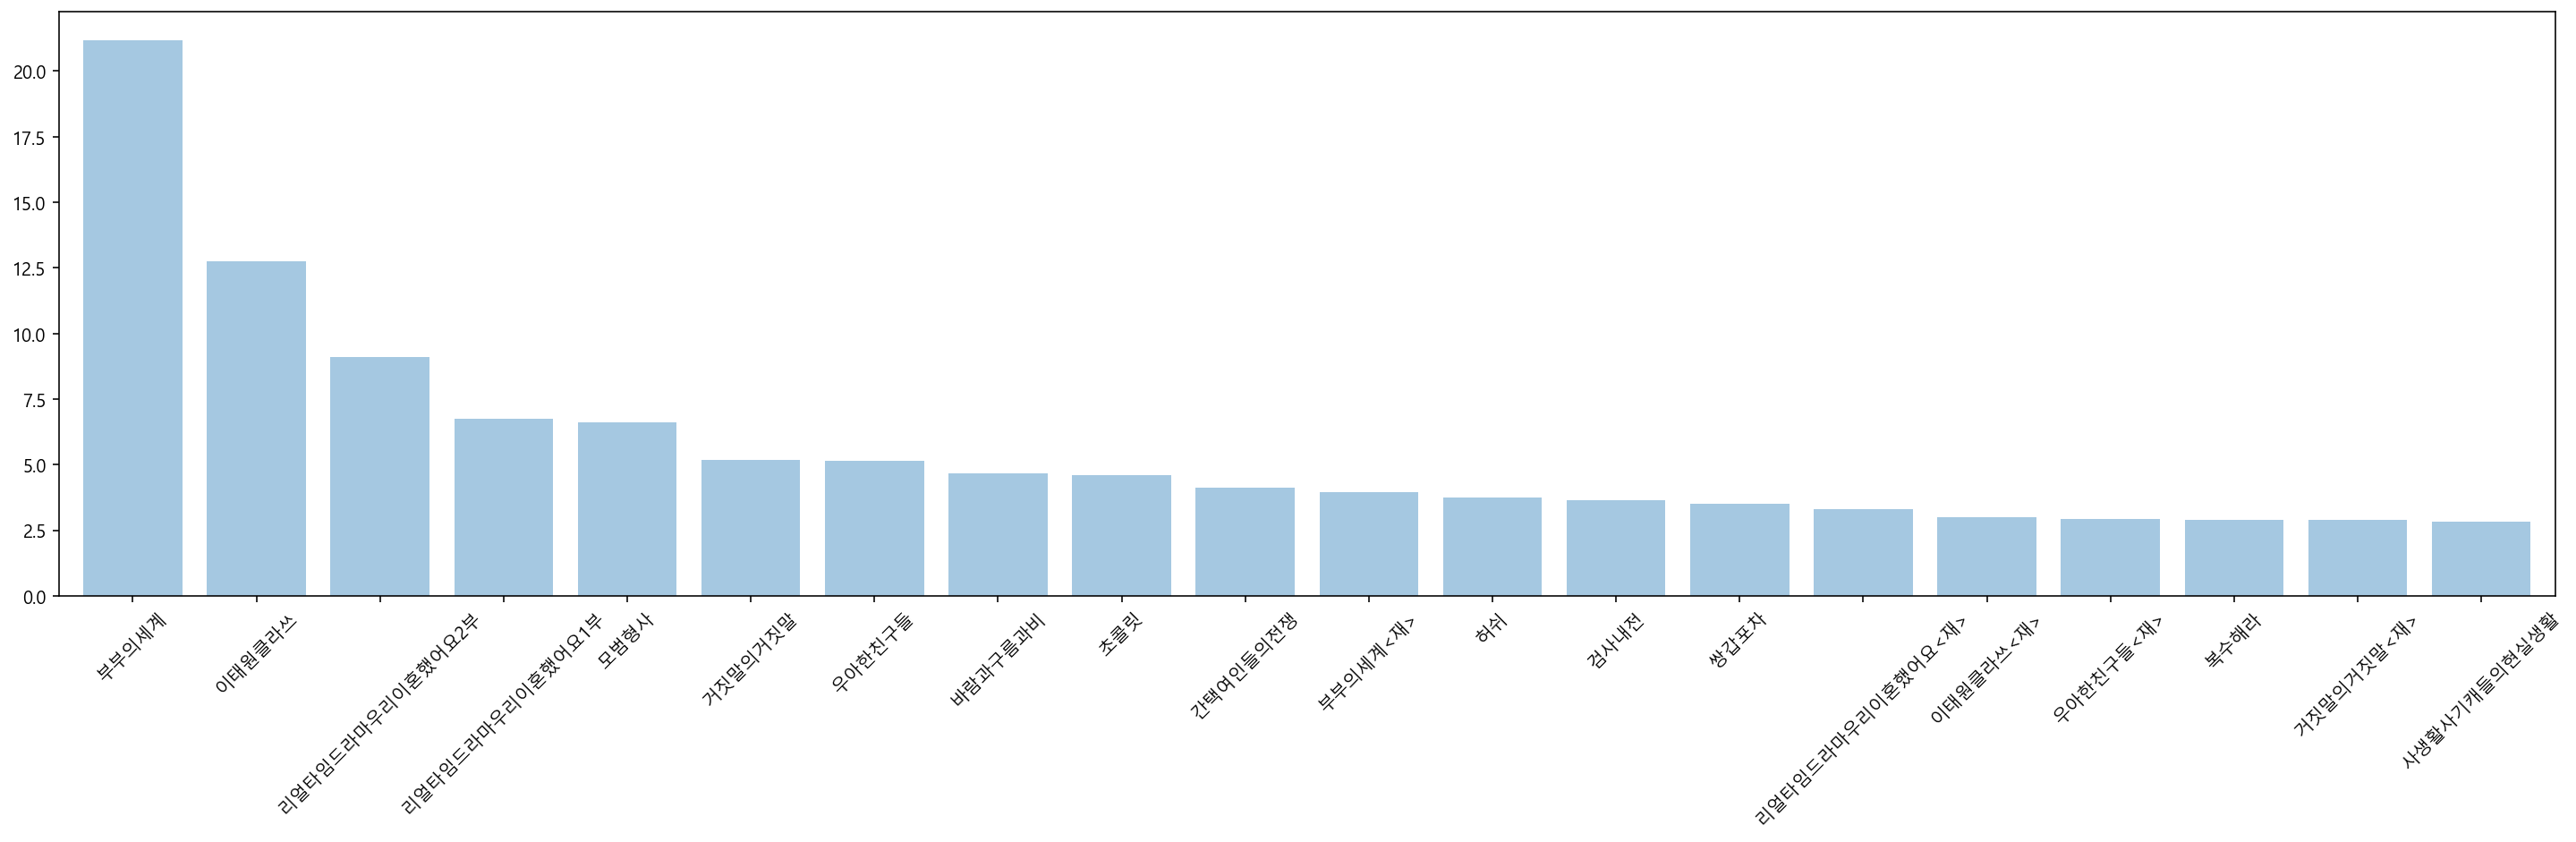

In [38]:
df_total_2020_percent_group_sum = df_total_2020_percent_drama['시청률'].groupby(df_total_2020_percent_drama['프로그램명']).mean().sort_values(ascending = False)
df_total_2020_percent_group_sum = df_total_2020_percent_group_sum.head(20)

plt.figure(figsize=(25,6))
plt.bar(df_total_2020_percent_group_sum.index, df_total_2020_percent_group_sum.values, alpha=0.4)
plt.xticks(rotation=45)

ax = plt.subplot()
ax.margins(x=0.01)

plt.show()

In [39]:
df_total_2020_percent_group_sum.head(20)

프로그램명
부부의세계                21.187500
이태원클라쓰               12.743800
리얼타임드라마우리이혼했어요2부      9.106833
리얼타임드라마우리이혼했어요1부      6.751000
모범형사                  6.626750
거짓말의거짓말               5.177308
우아한친구들                5.128765
바람과구름과비               4.652850
초콜릿                   4.603167
간택여인들의전쟁              4.117750
부부의세계<재>              3.944714
허쉬                    3.743500
검사내전                  3.636167
쌍갑포차                  3.490111
리얼타임드라마우리이혼했어요<재>     3.302111
이태원클라쓰<재>             3.000000
우아한친구들<재>             2.916000
복수해라                  2.907600
거짓말의거짓말<재>            2.903500
사생활사기캐들의현실생활          2.816000
Name: 시청률, dtype: float64

## Top 20위 드라마 분석
1. 부부의세계 -> O
2. 이태원클라쓰 -> O
3. 리얼타임드라마우리이혼했어요2부
4. 리얼타임드라마우리이혼했어요1부
5. 모범형사 -> O
6. 거짓말의거짓말
7. 우아한친구들 -> O
8. 바람과구름과비 -> O
9. 초콜릿 -> O (2019)
10. 간택여인들의전쟁 -> X
11. 부부의세계<재>
12. 허쉬 -> X
13. 검사내전 -> X
14. 쌍갑포차 -> O
15. 리얼타임드라마우리이혼했어요<재>
16. 이태원클라쓰<재>
17. 우아한친구들<재>
18. 복수해라 -> X
19. 거짓말의거짓말<재>
20. 사생활사기캐들의현실생활 -> X

=> 지상파보다는 넷플릭스에서 볼 수 있는 드라마들이 더 많음

- 종합편성이 상대적으로 지상파 보다 시청률이 평균이 낮은 편
 -> 넷플릭스에선 종합편성을 더 많이 보여줌 -> 시청률에 넷플릭스가 포함되지 않으니 이슈화 반영 잘 안됨

# 지상파 시청률 2021

In [40]:
df_ground_2021_1 = pd.read_csv('닐슨_일간순위_2021(1.26까지).csv', sep=',', encoding='UTF-8')
df_ground_2021_1

,프로그램명,시점,시청률/시청자수
0,일일드라마(누가뭐래도),202111,18.1
1,일일드라마(비밀의남자),202111,17.0
2,아침마당,202111,11.3
3,KBS9시뉴스,202111,10.1
4,코로나19통합뉴스룸,202111,10.0
...,...,...,...
1035,MBC뉴스데스크2부,2021126,653
1036,KBS뉴스7,2021126,641
1037,PD수첩,2021126,640
1038,일일드라마(밥이되어라),2021126,588


In [41]:
df_ground_2021_2 = pd.read_csv('닐슨_일간순위_2021(1.28-1.31).csv', sep=',', encoding='UTF-8')
df_ground_2021_2

,프로그램명,시점,시청률/시청자수
0,일일드라마(누가뭐래도),2021128,20.1
1,일일드라마(비밀의남자),2021128,16.9
2,KBS9시뉴스,2021128,13.4
3,한국인의밥상,2021128,9.1
4,6시내고향,2021128,9.1
...,...,...,...
155,미스터리음악쇼복면가왕,2021131,855
156,구해줘홈즈,2021131,823
157,코로나19통합뉴스룸,2021131,805
158,슈퍼맨이돌아왔다,2021131,738


In [42]:
df_ground_2021_3 = pd.read_csv('닐슨_일간순위_2021(2월).csv', sep=',', encoding='UTF-8')
df_ground_2021_3

,프로그램명,시점,시청률/시청자수
0,일일드라마(누가뭐래도),202121,19.3
1,일일드라마(비밀의남자),202121,16.5
2,월화드라마(암행어사조선비밀수사단),202121,12.6
3,KBS9시뉴스,202121,11.5
4,인간극장,202121,9.1
...,...,...,...
1115,구해줘홈즈,2021228,715
1116,KBS9시뉴스,2021228,666
1117,SBS8뉴스,2021228,641
1118,미스터리음악쇼복면가왕,2021228,633


In [43]:
df_ground_2021_4 = pd.read_csv('닐슨_일간순위_2021(3월-12월).csv', sep=',', encoding='UTF-8')
df_ground_2021_4

,프로그램명,시점,시청률/시청자수
0,일일드라마(누가뭐래도),202131,20.7
1,일일드라마(미스몬테크리스토),202131,12.3
2,KBS뉴스특보,202131,12.2
3,KBS9시뉴스,202131,12.0
4,동상이몽2너는내운명,202131,8.4
...,...,...,...
12235,2021SBS연기대상,20211231,584
12236,코로나19통합뉴스룸,20211231,558
12237,내추럴휴먼다큐(자연의철학자들),20211231,522
12238,무엇이든물어보세요,20211231,497


In [44]:
df_ground_2021_1_percent = pd.DataFrame()

i=1
j=20
while True:
    percent = df_ground_2021_1[i-1:j]
    df_ground_2021_1_percent = df_ground_2021_1_percent.append(percent)
    i = i+40
    j = j+40
    if j >= 14600:
        break
    
df_ground_2021_1_percent

,프로그램명,시점,시청률/시청자수
0,일일드라마(누가뭐래도),202111,18.1
1,일일드라마(비밀의남자),202111,17.0
2,아침마당,202111,11.3
3,KBS9시뉴스,202111,10.1
4,코로나19통합뉴스룸,202111,10.0
...,...,...,...
1015,무엇이든물어보세요,2021126,6.0
1016,일일드라마(밥이되어라),2021126,5.9
1017,불타는청춘,2021126,5.7
1018,MBC뉴스데스크2부,2021126,5.6


In [45]:
df_ground_2021_2_percent = pd.DataFrame()

i=1
j=20
while True:
    percent = df_ground_2021_2[i-1:j]
    df_ground_2021_2_percent = df_ground_2021_2_percent.append(percent)
    i = i+40
    j = j+40
    if j >= 14600:
        break
    
df_ground_2021_2_percent

,프로그램명,시점,시청률/시청자수
0,일일드라마(누가뭐래도),2021128,20.1
1,일일드라마(비밀의남자),2021128,16.9
2,KBS9시뉴스,2021128,13.4
3,한국인의밥상,2021128,9.1
4,6시내고향,2021128,9.1
...,...,...,...
135,구해줘홈즈,2021131,7.0
136,트롯전국체전<재>,2021131,6.7
137,전국노래자랑스페셜,2021131,6.7
138,동거동락인생과외집사부일체,2021131,6.6


In [46]:
df_ground_2021_3_percent = pd.DataFrame()

i=1
j=20
while True:
    percent = df_ground_2021_3[i-1:j]
    df_ground_2021_3_percent = df_ground_2021_3_percent.append(percent)
    i = i+40
    j = j+40
    if j >= 14600:
        break
    
df_ground_2021_3_percent

,프로그램명,시점,시청률/시청자수
0,일일드라마(누가뭐래도),202121,19.3
1,일일드라마(비밀의남자),202121,16.5
2,월화드라마(암행어사조선비밀수사단),202121,12.6
3,KBS9시뉴스,202121,11.5
4,인간극장,202121,9.1
...,...,...,...
1095,코로나19통합뉴스룸,2021228,6.0
1096,런닝맨,2021228,6.0
1097,구해줘홈즈,2021228,5.8
1098,슈퍼맨이돌아왔다<재>,2021228,5.8


In [47]:
df_ground_2021_4_percent = pd.DataFrame()

i=1
j=20
while True:
    percent = df_ground_2021_4[i-1:j]
    df_ground_2021_4_percent = df_ground_2021_4_percent.append(percent)
    i = i+40
    j = j+40
    if j >= 14600:
        break
    
df_ground_2021_4_percent

,프로그램명,시점,시청률/시청자수
0,일일드라마(누가뭐래도),202131,20.7
1,일일드라마(미스몬테크리스토),202131,12.3
2,KBS뉴스특보,202131,12.2
3,KBS9시뉴스,202131,12.0
4,동상이몽2너는내운명,202131,8.4
...,...,...,...
12215,SBS8뉴스,20211231,5.8
12216,2021SBS연기대상,20211231,5.5
12217,2021MBC가요대제전TOGETHER1부,20211231,5.4
12218,KBS뉴스광장2부,20211231,5.1


In [48]:
df_ground_2021_1_count = pd.DataFrame()

i=20
j=40
while True:
    count = df_ground_2021_1[i:j]
    df_ground_2021_1_count = df_ground_2021_1_count.append(count)
    i = i+40
    j = j+40
    if j > 14600:
        break
    
df_ground_2021_1_count

,프로그램명,시점,시청률/시청자수
20,일일드라마(누가뭐래도),202111,"1,797"
21,일일드라마(비밀의남자),202111,"1,626"
22,궁금한이야기Y,202111,"1,170"
23,SBS8뉴스2부,202111,"1,131"
24,KBS9시뉴스,202111,"1,050"
...,...,...,...
1035,MBC뉴스데스크2부,2021126,653
1036,KBS뉴스7,2021126,641
1037,PD수첩,2021126,640
1038,일일드라마(밥이되어라),2021126,588


In [49]:
df_ground_2021_2_count = pd.DataFrame()

i=20
j=40
while True:
    count = df_ground_2021_2[i:j]
    df_ground_2021_2_count = df_ground_2021_2_count.append(count)
    i = i+40
    j = j+40
    if j > 14600:
        break
    
df_ground_2021_2_count

,프로그램명,시점,시청률/시청자수
20,일일드라마(누가뭐래도),2021128,"1,932"
21,일일드라마(비밀의남자),2021128,"1,680"
22,KBS9시뉴스,2021128,"1,411"
23,한국인의밥상,2021128,923
24,SBS8뉴스2부,2021128,882
...,...,...,...
155,미스터리음악쇼복면가왕,2021131,855
156,구해줘홈즈,2021131,823
157,코로나19통합뉴스룸,2021131,805
158,슈퍼맨이돌아왔다,2021131,738


In [50]:
df_ground_2021_3_count = pd.DataFrame()

i=20
j=40
while True:
    count = df_ground_2021_3[i:j]
    df_ground_2021_3_count = df_ground_2021_3_count.append(count)
    i = i+40
    j = j+40
    if j > 14600:
        break
    
df_ground_2021_3_count

,프로그램명,시점,시청률/시청자수
20,일일드라마(누가뭐래도),202121,"1,792"
21,일일드라마(비밀의남자),202121,"1,543"
22,월화드라마(암행어사조선비밀수사단),202121,"1,320"
23,KBS9시뉴스,202121,"1,115"
24,월화드라마(암행어사조선비밀수사단),202121,928
...,...,...,...
1115,구해줘홈즈,2021228,715
1116,KBS9시뉴스,2021228,666
1117,SBS8뉴스,2021228,641
1118,미스터리음악쇼복면가왕,2021228,633


In [51]:
df_ground_2021_4_count = pd.DataFrame()

i=20
j=40
while True:
    count = df_ground_2021_4[i:j]
    df_ground_2021_4_count = df_ground_2021_4_count.append(count)
    i = i+40
    j = j+40
    if j > 14600:
        break
    
df_ground_2021_4_count

,프로그램명,시점,시청률/시청자수
20,일일드라마(누가뭐래도),202131,"1,975"
21,KBS뉴스특보,202131,"1,232"
22,KBS9시뉴스,202131,"1,206"
23,일일드라마(미스몬테크리스토),202131,"1,177"
24,월화드라마(달이뜨는강),202131,948
...,...,...,...
12235,2021SBS연기대상,20211231,584
12236,코로나19통합뉴스룸,20211231,558
12237,내추럴휴먼다큐(자연의철학자들),20211231,522
12238,무엇이든물어보세요,20211231,497


In [52]:
df_ground_2021_1_percent = df_ground_2021_1_percent.reset_index(drop=True)
df_ground_2021_1_percent = df_ground_2021_1_percent.rename(columns={'시청률/시청자수':'시청률'})
df_ground_2021_2_percent = df_ground_2021_2_percent.reset_index(drop=True)
df_ground_2021_2_percent = df_ground_2021_2_percent.rename(columns={'시청률/시청자수':'시청률'})
df_ground_2021_3_percent = df_ground_2021_3_percent.reset_index(drop=True)
df_ground_2021_3_percent = df_ground_2021_3_percent.rename(columns={'시청률/시청자수':'시청률'})
df_ground_2021_4_percent = df_ground_2021_4_percent.reset_index(drop=True)
df_ground_2021_4_percent = df_ground_2021_4_percent.rename(columns={'시청률/시청자수':'시청률'})

df_ground_2021_1_count = df_ground_2021_1_count.reset_index(drop=True)
df_ground_2021_1_count = df_ground_2021_1_count.rename(columns={'시청률/시청자수':'시청자수'})
df_ground_2021_2_count = df_ground_2021_2_count.reset_index(drop=True)
df_ground_2021_2_count = df_ground_2021_2_count.rename(columns={'시청률/시청자수':'시청자수'})
df_ground_2021_3_count = df_ground_2021_3_count.reset_index(drop=True)
df_ground_2021_3_count = df_ground_2021_3_count.rename(columns={'시청률/시청자수':'시청자수'})
df_ground_2021_4_count = df_ground_2021_4_count.reset_index(drop=True)
df_ground_2021_4_count = df_ground_2021_4_count.rename(columns={'시청률/시청자수':'시청자수'})

In [53]:
df_ground_2021_percent = pd.concat([df_ground_2021_1_percent,df_ground_2021_2_percent,df_ground_2021_3_percent,df_ground_2021_4_percent], ignore_index=True)
df_ground_2021_percent

,프로그램명,시점,시청률
0,일일드라마(누가뭐래도),202111,18.1
1,일일드라마(비밀의남자),202111,17.0
2,아침마당,202111,11.3
3,KBS9시뉴스,202111,10.1
4,코로나19통합뉴스룸,202111,10.0
...,...,...,...
7275,SBS8뉴스,20211231,5.8
7276,2021SBS연기대상,20211231,5.5
7277,2021MBC가요대제전TOGETHER1부,20211231,5.4
7278,KBS뉴스광장2부,20211231,5.1


In [54]:
len(df_ground_2021_1_percent) + len(df_ground_2021_2_percent) + len(df_ground_2021_3_percent) + len(df_ground_2021_4_percent) 

7280

In [55]:
df_ground_2021_count = pd.concat([df_ground_2021_1_count,df_ground_2021_2_count,df_ground_2021_3_count,df_ground_2021_4_count], ignore_index=True)
df_ground_2021_count

,프로그램명,시점,시청자수
0,일일드라마(누가뭐래도),202111,"1,797"
1,일일드라마(비밀의남자),202111,"1,626"
2,궁금한이야기Y,202111,"1,170"
3,SBS8뉴스2부,202111,"1,131"
4,KBS9시뉴스,202111,"1,050"
...,...,...,...
7275,2021SBS연기대상,20211231,584
7276,코로나19통합뉴스룸,20211231,558
7277,내추럴휴먼다큐(자연의철학자들),20211231,522
7278,무엇이든물어보세요,20211231,497


In [56]:
# 시청률 DataFrame에서 '드라마' 포함된 행
df_ground_2021_percent_drama = df_ground_2021_percent[df_ground_2021_percent['프로그램명'].str.contains('드라마')]
df_ground_2021_percent_drama = df_ground_2021_percent_drama.reset_index(drop=True)
df_ground_2021_percent_drama

,프로그램명,시점,시청률
0,일일드라마(누가뭐래도),202111,18.1
1,일일드라마(비밀의남자),202111,17.0
2,일일드라마(찬란한내인생),202111,7.3
3,주말드라마(오삼광빌라),202112,30.5
4,주말드라마(오삼광빌라),202112,26.5
...,...,...,...
1123,일일드라마(두번째남편),20211229,8.4
1124,저녁일일드라마(사랑의꽈배기),20211230,11.8
1125,일일드라마(두번째남편),20211230,8.2
1126,저녁일일드라마(사랑의꽈배기),20211231,10.8


In [57]:
df_ground_2021_percent_drama['프로그램명'] = df_ground_2021_percent_drama.프로그램명.str.split('(').str[1]
df_ground_2021_percent_drama['프로그램명'] = df_ground_2021_percent_drama.프로그램명.str.strip(')')
df_ground_2021_percent_drama

,프로그램명,시점,시청률
0,누가뭐래도,202111,18.1
1,비밀의남자,202111,17.0
2,찬란한내인생,202111,7.3
3,오삼광빌라,202112,30.5
4,오삼광빌라,202112,26.5
...,...,...,...
1123,두번째남편,20211229,8.4
1124,사랑의꽈배기,20211230,11.8
1125,두번째남편,20211230,8.2
1126,사랑의꽈배기,20211231,10.8


In [58]:
name = set(df_ground_2021_percent_drama['프로그램명'])
len(name)

50

In [59]:
df_ground_2021_percent_drama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   프로그램명   1128 non-null   object
 1   시점      1128 non-null   int64 
 2   시청률     1128 non-null   object
dtypes: int64(1), object(2)
memory usage: 26.6+ KB


In [60]:
df_ground_2021_percent_drama['시청률'] = df_ground_2021_percent_drama['시청률'].astype('float')

In [61]:
name = df_ground_2021_percent_drama[df_ground_2021_percent_drama['프로그램명'].str.contains('펜트하우스')]
name = set(name['프로그램명'])
name

{'WARINLIFE펜트하우스',
 'WARINLIFE펜트하우스2',
 'WARINLIFE펜트하우스2<재>',
 'WARINLIFE펜트하우스2히든룸끝나지않은이야기1부',
 'WARINLIFE펜트하우스2히든룸끝나지않은이야기2부',
 'WARINLIFE펜트하우스3',
 'WARINLIFE펜트하우스히든룸숨겨진이야기1부',
 'WARINLIFE펜트하우스히든룸숨겨진이야기2부'}

In [63]:
df_ground_2021_percent_drama

,프로그램명,시점,시청률
0,누가뭐래도,202111,18.1
1,비밀의남자,202111,17.0
2,찬란한내인생,202111,7.3
3,오삼광빌라,202112,30.5
4,오삼광빌라,202112,26.5
...,...,...,...
1123,두번째남편,20211229,8.4
1124,사랑의꽈배기,20211230,11.8
1125,두번째남편,20211230,8.2
1126,사랑의꽈배기,20211231,10.8


In [64]:
df_ground_2021_percent_group = df_ground_2021_percent_drama.groupby(['프로그램명','시점']).mean()
df_ground_2021_percent_group

시청률
프로그램명           시점                 
WARINLIFE펜트하우스  202114    23.400000
                202115    27.650000
WARINLIFE펜트하우스2 202135    24.000000
                202136    25.150000
                202142    24.366667
...                             ...
홍천기             20211019   9.000000
                20211025   8.100000
                20211026  10.000000
홍천기<재>          2021102    4.000000
홍천기모아보기         2021923    3.700000

[1003 rows x 1 columns]

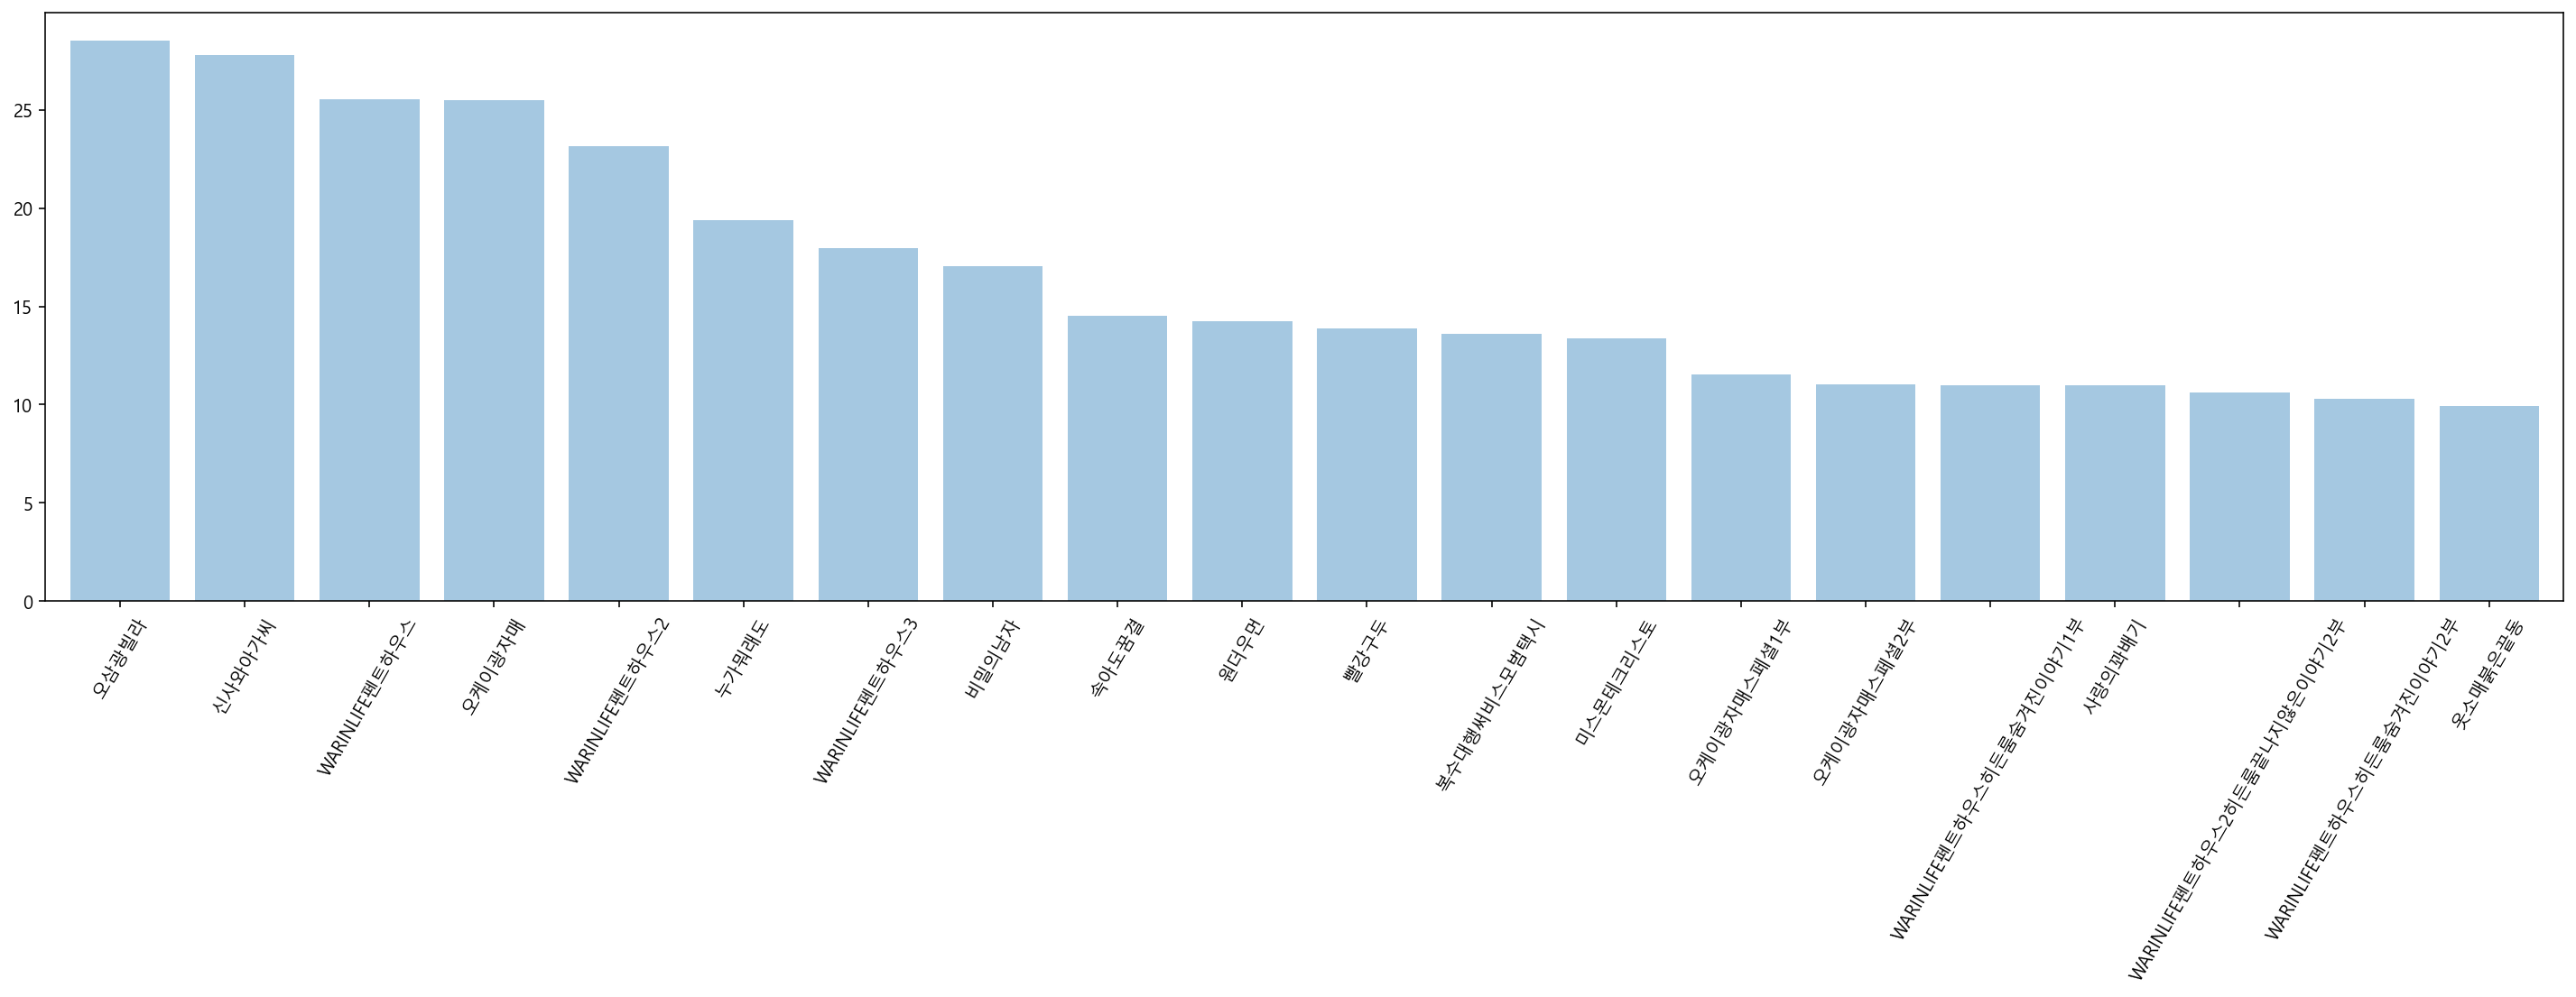

In [65]:
df_ground_2021_percent_group_sum = df_ground_2021_percent_drama['시청률'].groupby(df_ground_2021_percent_drama['프로그램명']).mean().sort_values(ascending = False)
df_ground_2021_percent_group_sum = df_ground_2021_percent_group_sum.head(20)

plt.figure(figsize=(25,6))
plt.bar(df_ground_2021_percent_group_sum.index, df_ground_2021_percent_group_sum.values, alpha=0.4)
plt.xticks(rotation=60)

ax = plt.subplot()
ax.margins(x=0.01)

plt.show()

In [66]:
df_ground_2021_percent_group_sum.head(20)

프로그램명
오삼광빌라                           28.515000
신사와아가씨                          27.782143
WARINLIFE펜트하우스                  25.525000
오케이광자매                          25.483750
WARINLIFE펜트하우스2                 23.159259
누가뭐래도                           19.363333
WARINLIFE펜트하우스3                 17.940909
비밀의남자                           17.057143
속아도꿈결                           14.529167
원더우먼                            14.225000
빨강구두                            13.890000
복수대행써비스모범택시                     13.600000
미스몬테크리스토                        13.382000
오케이광자매스페셜1부                     11.550000
오케이광자매스페셜2부                     11.050000
WARINLIFE펜트하우스히든룸숨겨진이야기1부       11.000000
사랑의꽈배기                          10.966667
WARINLIFE펜트하우스2히든룸끝나지않은이야기2부    10.600000
WARINLIFE펜트하우스히든룸숨겨진이야기2부       10.300000
옷소매붉은끝동                          9.926667
Name: 시청률, dtype: float64

In [69]:
df_ground_2021_count_drama

,프로그램명,시점,시청자수
0,일일드라마(누가뭐래도),202111,"1,797"
1,일일드라마(비밀의남자),202111,"1,626"
2,금토드라마(날아라개천용),202111,883
3,금토드라마(날아라개천용),202111,761
4,일일드라마(찬란한내인생),202111,745
...,...,...,...
1164,일일드라마(두번째남편),20211229,881
1165,저녁일일드라마(사랑의꽈배기),20211230,"1,105"
1166,일일드라마(두번째남편),20211230,835
1167,저녁일일드라마(사랑의꽈배기),20211231,"1,122"


In [70]:
# 시청자수 DataFrame에서 '드라마' 포함된 행
df_ground_2021_count_drama = df_ground_2021_count[df_ground_2021_count['프로그램명'].str.contains('드라마')]
df_ground_2021_count_drama = df_ground_2021_count_drama.reset_index(drop=True)
df_ground_2021_count_drama

,프로그램명,시점,시청자수
0,일일드라마(누가뭐래도),202111,"1,797"
1,일일드라마(비밀의남자),202111,"1,626"
2,금토드라마(날아라개천용),202111,883
3,금토드라마(날아라개천용),202111,761
4,일일드라마(찬란한내인생),202111,745
...,...,...,...
1164,일일드라마(두번째남편),20211229,881
1165,저녁일일드라마(사랑의꽈배기),20211230,"1,105"
1166,일일드라마(두번째남편),20211230,835
1167,저녁일일드라마(사랑의꽈배기),20211231,"1,122"


In [71]:
df_ground_2021_count_drama['프로그램명'] = df_ground_2021_count_drama.프로그램명.str.split('(').str[1]
df_ground_2021_count_drama['프로그램명'] = df_ground_2021_count_drama.프로그램명.str.strip(')')
df_ground_2021_count_drama['시청자수'] = df_ground_2021_count_drama.시청자수.str.replace(",", "")
df_ground_2021_count_drama

,프로그램명,시점,시청자수
0,누가뭐래도,202111,1797
1,비밀의남자,202111,1626
2,날아라개천용,202111,883
3,날아라개천용,202111,761
4,찬란한내인생,202111,745
...,...,...,...
1164,두번째남편,20211229,881
1165,사랑의꽈배기,20211230,1105
1166,두번째남편,20211230,835
1167,사랑의꽈배기,20211231,1122


In [72]:
df_ground_2021_count_drama['시청자수'] = df_ground_2021_count_drama['시청자수'].astype('int')
df_ground_2021_count_drama

,프로그램명,시점,시청자수
0,누가뭐래도,202111,1797
1,비밀의남자,202111,1626
2,날아라개천용,202111,883
3,날아라개천용,202111,761
4,찬란한내인생,202111,745
...,...,...,...
1164,두번째남편,20211229,881
1165,사랑의꽈배기,20211230,1105
1166,두번째남편,20211230,835
1167,사랑의꽈배기,20211231,1122


In [73]:
df_ground_2021_count_group = df_ground_2021_count_drama.groupby(['프로그램명','시점']).mean()
df_ground_2021_count_group

시청자수
프로그램명           시점                   
WARINLIFE펜트하우스  202114    2775.000000
                202115    3233.500000
WARINLIFE펜트하우스2 202135    2747.000000
                202136    2993.000000
                202142    2795.666667
...                               ...
홍천기             20211019   967.000000
                20211025   980.000000
                20211026  1090.000000
홍천기<재>          2021102    366.000000
홍천기모아보기         2021923    403.000000

[1022 rows x 1 columns]

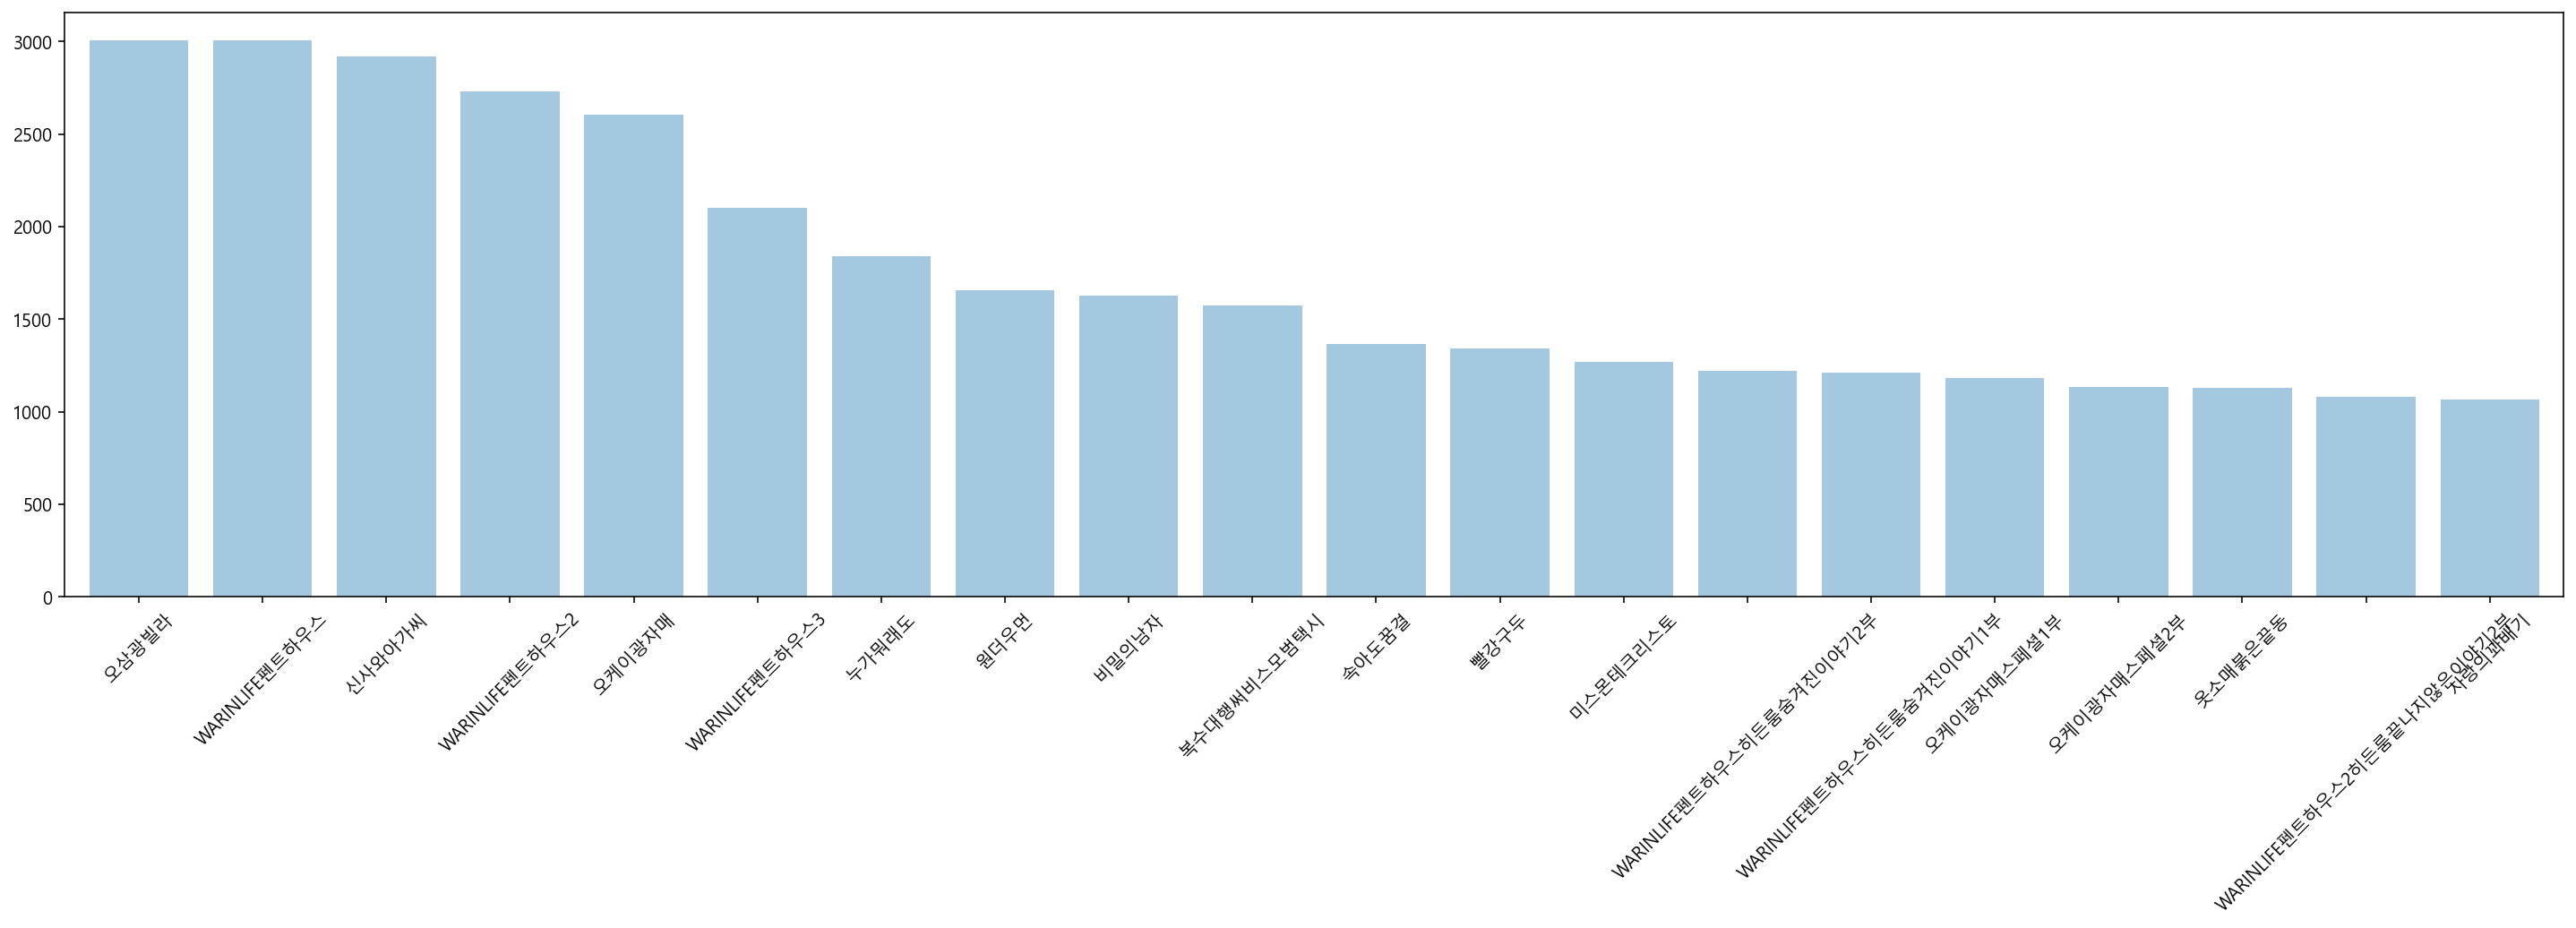

In [76]:
df_ground_2021_count_group_sum = df_ground_2021_count_drama['시청자수'].groupby(df_ground_2021_count_drama['프로그램명']).mean().sort_values(ascending = False)
df_ground_2021_count_group_sum = df_ground_2021_count_group_sum.head(20)

plt.figure(figsize=(25,6))
plt.bar(df_ground_2021_count_group_sum.index, df_ground_2021_count_group_sum.values, alpha=0.4)
plt.xticks(rotation=45)

ax = plt.subplot()
ax.margins(x=0.01)

plt.show()

In [77]:
df_ground_2021_count_group_sum.head(20)

프로그램명
오삼광빌라                           3006.025000
WARINLIFE펜트하우스                  3004.250000
신사와아가씨                          2920.750000
WARINLIFE펜트하우스2                 2732.222222
오케이광자매                          2603.112500
WARINLIFE펜트하우스3                 2101.136364
누가뭐래도                           1839.383333
원더우먼                            1654.125000
비밀의남자                           1626.857143
복수대행써비스모범택시                     1575.000000
속아도꿈결                           1365.733333
빨강구두                            1340.500000
미스몬테크리스토                        1268.540000
WARINLIFE펜트하우스히든룸숨겨진이야기2부       1220.000000
WARINLIFE펜트하우스히든룸숨겨진이야기1부       1213.000000
오케이광자매스페셜1부                     1181.000000
오케이광자매스페셜2부                     1133.500000
옷소매붉은끝동                         1127.933333
WARINLIFE펜트하우스2히든룸끝나지않은이야기2부    1083.000000
사랑의꽈배기                          1064.800000
Name: 시청자수, dtype: float64

## Top 20위 드라마 분석
1. 오삼광빌라 -> X
2. 신사와아가씨 -> X
3. WARINLIFE펜트하우스 -> X
4. 오케이광자매 -> X
5. WARINLIFE펜트하우스2 -> X
6. 누가뭐래도 -> X
7. WARINLIFE펜트하우스3 -> X
8. 비밀의남자 -> X
9. 속아도꿈결 -> X
10. 원더우먼 -> X
11. 빨강구두 -> X
12. 복수대행써비스모범택시 -> X
13. 미스몬테크리스토 -> X
14. 오케이광자매스페셜1부 -> X
15. 오케이광자매스페셜2부 -> X
16. WARINLIFE펜트하우스히든룸숨겨진이야기1부 -> X
17. 사랑의꽈배기 -> X
18. WARINLIFE펜트하우스2히든룸끝나지않은이야기2부 -> X
19. WARINLIFE펜트하우스히든룸숨겨진이야기2부 -> X
20. 옷소매붉은끝동 -> X

=> Top20위 중 넷플릭스에서 볼 수 있는 드라마는 없음

# 종합편성 시청률 2021

In [78]:
df_total_2021_1 = pd.read_csv('닐슨_일간순위(종)_2021(1.26까지).csv', sep=',', encoding='UTF-8')
df_total_2021_1

,프로그램명,시점,시청률/시청자수
0,사랑의콜센타2부,202111,14.510
1,사랑의콜센타1부,202111,11.504
2,내일은미스트롯2예선전하이라이트,202111,6.646
3,TV조선뉴스9,202111,6.348
4,보도본부핫라인,202111,5.833
...,...,...,...
515,보도본부핫라인,202111,410
516,뉴스TOP10,202111,407
517,시사쇼이것이정치다,202111,394
518,뉴스A,202111,376


In [79]:
df_total_2021_2 = pd.read_csv('닐슨_일간순위(종)_2021(1.28-1.31).csv', sep=',', encoding='UTF-8')
df_total_2021_2

,프로그램명,시점,시청률/시청자수
0,내일은미스트롯2-2부,2021128,26.133
1,내일은미스트롯2-1부,2021128,24.340
2,TV조선뉴스9,2021128,7.014
3,뉴스파이터,2021128,4.776
4,보도본부핫라인,2021128,4.443
...,...,...,...
75,1호가될순없어,2021128,441
76,사랑의콜센타<재>,2021128,416
77,주말미니시리즈(결혼작사이혼작곡<재>),2021128,333
78,MBN종합뉴스,2021128,301


In [80]:
df_total_2021_3 = pd.read_csv('닐슨_일간순위(종)_2021(2월).csv', sep=',', encoding='UTF-8')
df_total_2021_3

,프로그램명,시점,시청률/시청자수
0,싱어게인무명가수전,202121,11.753
1,리얼타임드라마우리이혼했어요2부,202121,7.366
2,리얼타임드라마우리이혼했어요1부,202121,7.055
3,TV조선뉴스9,202121,5.830
4,뉴스파이터,202121,4.474
...,...,...,...
555,내일은미스트롯2<재>,202121,319
556,알토란,202121,294
557,속풀이쇼동치미<재>,202121,286
558,이제만나러갑니다,202121,276


In [81]:
df_total_2021_4 = pd.read_csv('닐슨_일간순위(종)_2021(3월-12월).csv', sep=',', encoding='UTF-8')
df_total_2021_4

,프로그램명,시점,시청률/시청자수
0,TV조선뉴스9,202031,6.009
1,내일은미스트롯2-7공주스페셜2부,202031,5.980
2,내일은미스트롯2-7공주스페셜1부,202031,4.749
3,사랑의콜센타<재>,202031,4.210
4,JTBC뉴스룸,202031,3.675
...,...,...,...
6115,싱어게인무명가수전2<재>,202031,272
6116,뉴스파이터,202031,272
6117,MBN뉴스와이드,202031,249
6118,화요일은밤이좋아특별판,202031,240


In [82]:
df_total_2021_1_percent = pd.DataFrame()

i=1
j=10
while True:
    percent = df_total_2021_1[i-1:j]
    df_total_2021_1_percent = df_total_2021_1_percent.append(percent)
    i = i+20
    j = j+20
    if j >= 14600:
        break
    
df_total_2021_1_percent

,프로그램명,시점,시청률/시청자수
0,사랑의콜센타2부,202111,14.510
1,사랑의콜센타1부,202111,11.504
2,내일은미스트롯2예선전하이라이트,202111,6.646
3,TV조선뉴스9,202111,6.348
4,보도본부핫라인,202111,5.833
...,...,...,...
505,시사쇼이것이정치다,202111,5.230
506,팬텀싱어올스타전,202111,4.641
507,뉴스TOP10,202111,4.315
508,내일은미스트롯2베스트,202111,4.296


In [83]:
df_total_2021_2_percent = pd.DataFrame()

i=1
j=10
while True:
    percent = df_total_2021_2[i-1:j]
    df_total_2021_2_percent = df_total_2021_2_percent.append(percent)
    i = i+20
    j = j+20
    if j >= 14600:
        break
    
df_total_2021_2_percent

,프로그램명,시점,시청률/시청자수
0,내일은미스트롯2-2부,2021128,26.133
1,내일은미스트롯2-1부,2021128,24.340
2,TV조선뉴스9,2021128,7.014
3,뉴스파이터,2021128,4.776
4,보도본부핫라인,2021128,4.443
5,사랑의콜센타베스트,2021128,4.126
6,수목드라마(런온),2021128,3.675
7,시사쇼이것이정치다,2021128,3.637
8,뉴스TOP10,2021128,3.542
9,나만믿고따라와도시어부2-2부,2021128,3.399


In [84]:
df_total_2021_3_percent = pd.DataFrame()

i=1
j=10
while True:
    percent = df_total_2021_3[i-1:j]
    df_total_2021_3_percent = df_total_2021_3_percent.append(percent)
    i = i+20
    j = j+20
    if j >= 14600:
        break
    
df_total_2021_3_percent

,프로그램명,시점,시청률/시청자수
0,싱어게인무명가수전,202121,11.753
1,리얼타임드라마우리이혼했어요2부,202121,7.366
2,리얼타임드라마우리이혼했어요1부,202121,7.055
3,TV조선뉴스9,202121,5.830
4,뉴스파이터,202121,4.474
...,...,...,...
545,TV조선뉴스7,202121,4.258
546,속풀이쇼동치미<재>,202121,3.520
547,알토란,202121,3.186
548,TV조선뉴스현장,202121,2.864


In [85]:
df_total_2021_4_percent = pd.DataFrame()

i=1
j=10
while True:
    percent = df_total_2021_4[i-1:j]
    df_total_2021_4_percent = df_total_2021_4_percent.append(percent)
    i = i+20
    j = j+20
    if j >= 14600:
        break
    
df_total_2021_4_percent

,프로그램명,시점,시청률/시청자수
0,TV조선뉴스9,202031,6.009
1,내일은미스트롯2-7공주스페셜2부,202031,5.980
2,내일은미스트롯2-7공주스페셜1부,202031,4.749
3,사랑의콜센타<재>,202031,4.210
4,JTBC뉴스룸,202031,3.675
...,...,...,...
6105,시사쇼이것이정치다,202031,2.892
6106,휴먼다큐(사노라면),202031,2.868
6107,김진의돌직구쇼,202031,2.812
6108,JTBC뉴스룸,202031,2.721


In [86]:
df_total_2021_1_count = pd.DataFrame()

i=10
j=20
while True:
    count = df_total_2021_1[i:j]
    df_total_2021_1_count = df_total_2021_1_count.append(count)
    i = i+20
    j = j+20
    if j > 14600:
        break
    
df_total_2021_1_count

,프로그램명,시점,시청률/시청자수
10,사랑의콜센타2부,202111,"1,495"
11,사랑의콜센타1부,202111,"1,134"
12,내일은미스트롯2예선전하이라이트,202111,624
13,보도본부핫라인,202111,562
14,TV조선뉴스9,202111,549
...,...,...,...
515,보도본부핫라인,202111,410
516,뉴스TOP10,202111,407
517,시사쇼이것이정치다,202111,394
518,뉴스A,202111,376


In [87]:
df_total_2021_2_count = pd.DataFrame()

i=10
j=20
while True:
    count = df_total_2021_2[i:j]
    df_total_2021_2_count = df_total_2021_2_count.append(count)
    i = i+20
    j = j+20
    if j > 14600:
        break
    
df_total_2021_2_count

,프로그램명,시점,시청률/시청자수
10,내일은미스트롯2-2부,2021128,"2,574"
11,내일은미스트롯2-1부,2021128,"2,387"
12,TV조선뉴스9,2021128,594
13,수목드라마(런온),2021128,391
14,나만믿고따라와도시어부2-2부,2021128,389
15,보도본부핫라인,2021128,356
16,뉴스파이터,2021128,336
17,JTBC뉴스룸,2021128,303
18,시사쇼이것이정치다,2021128,293
19,MBN종합뉴스,2021128,293


In [89]:
df_total_2021_3_count = pd.DataFrame()

i=10
j=20
while True:
    count = df_total_2021_3[i:j]
    df_total_2021_3_count = df_total_2021_3_count.append(count)
    i = i+20
    j = j+20
    if j > 14600:
        break
    
df_total_2021_3_count

,프로그램명,시점,시청률/시청자수
10,싱어게인무명가수전,202121,"1,268"
11,리얼타임드라마우리이혼했어요2부,202121,575
12,리얼타임드라마우리이혼했어요1부,202121,556
13,TV조선뉴스9,202121,462
14,뉴스파이터,202121,357
...,...,...,...
555,내일은미스트롯2<재>,202121,319
556,알토란,202121,294
557,속풀이쇼동치미<재>,202121,286
558,이제만나러갑니다,202121,276


In [90]:
df_total_2021_4_count = pd.DataFrame()

i=10
j=20
while True:
    count = df_total_2021_4[i:j]
    df_total_2021_4_count = df_total_2021_4_count.append(count)
    i = i+20
    j = j+20
    if j > 14600:
        break
    
df_total_2021_4_count

,프로그램명,시점,시청률/시청자수
10,TV조선뉴스9,202031,538
11,내일은미스트롯2-7공주스페셜2부,202031,529
12,JTBC뉴스룸,202031,361
13,내일은미스트롯2-7공주스페셜1부,202031,359
14,사랑의콜센타<재>,202031,336
...,...,...,...
6115,싱어게인무명가수전2<재>,202031,272
6116,뉴스파이터,202031,272
6117,MBN뉴스와이드,202031,249
6118,화요일은밤이좋아특별판,202031,240


In [91]:
df_total_2021_1_percent = df_total_2021_1_percent.reset_index(drop=True)
df_total_2021_1_percent = df_total_2021_1_percent.rename(columns={'시청률/시청자수':'시청률'})
df_total_2021_2_percent = df_total_2021_2_percent.reset_index(drop=True)
df_total_2021_2_percent = df_total_2021_2_percent.rename(columns={'시청률/시청자수':'시청률'})
df_total_2021_3_percent = df_total_2021_3_percent.reset_index(drop=True)
df_total_2021_3_percent = df_total_2021_3_percent.rename(columns={'시청률/시청자수':'시청률'})
df_total_2021_4_percent = df_total_2021_4_percent.reset_index(drop=True)
df_total_2021_4_percent = df_total_2021_4_percent.rename(columns={'시청률/시청자수':'시청률'})

df_total_2021_1_count = df_total_2021_1_count.reset_index(drop=True)
df_total_2021_1_count = df_total_2021_1_count.rename(columns={'시청률/시청자수':'시청자수'})
df_total_2021_2_count = df_total_2021_2_count.reset_index(drop=True)
df_total_2021_2_count = df_total_2021_2_count.rename(columns={'시청률/시청자수':'시청자수'})
df_total_2021_3_count = df_total_2021_3_count.reset_index(drop=True)
df_total_2021_3_count = df_total_2021_3_count.rename(columns={'시청률/시청자수':'시청자수'})
df_total_2021_4_count = df_total_2021_4_count.reset_index(drop=True)
df_total_2021_4_count = df_total_2021_4_count.rename(columns={'시청률/시청자수':'시청자수'})

In [92]:
df_total_2021_percent = pd.concat([df_total_2021_1_percent,df_total_2021_2_percent,df_total_2021_3_percent,df_total_2021_4_percent], ignore_index=True)
df_total_2021_percent

,프로그램명,시점,시청률
0,사랑의콜센타2부,202111,14.510
1,사랑의콜센타1부,202111,11.504
2,내일은미스트롯2예선전하이라이트,202111,6.646
3,TV조선뉴스9,202111,6.348
4,보도본부핫라인,202111,5.833
...,...,...,...
3635,시사쇼이것이정치다,202031,2.892
3636,휴먼다큐(사노라면),202031,2.868
3637,김진의돌직구쇼,202031,2.812
3638,JTBC뉴스룸,202031,2.721


In [93]:
len(df_total_2021_1_percent) + len(df_total_2021_2_percent) + len(df_total_2021_3_percent) + len(df_total_2021_4_percent) 

3640

In [94]:
df_total_2021_count = pd.concat([df_total_2021_1_count,df_total_2021_2_count,df_total_2021_3_count,df_total_2021_4_count], ignore_index=True)
df_total_2021_count

,프로그램명,시점,시청자수
0,사랑의콜센타2부,202111,"1,495"
1,사랑의콜센타1부,202111,"1,134"
2,내일은미스트롯2예선전하이라이트,202111,624
3,보도본부핫라인,202111,562
4,TV조선뉴스9,202111,549
...,...,...,...
3635,싱어게인무명가수전2<재>,202031,272
3636,뉴스파이터,202031,272
3637,MBN뉴스와이드,202031,249
3638,화요일은밤이좋아특별판,202031,240


In [95]:
df_total_2021_count.head(30)

,프로그램명,시점,시청자수
0,사랑의콜센타2부,202111,"1,495"
1,사랑의콜센타1부,202111,"1,134"
2,내일은미스트롯2예선전하이라이트,202111,624
3,보도본부핫라인,202111,562
4,TV조선뉴스9,202111,549
5,시사쇼이것이정치다,202111,410
6,내일은미스트롯2화제의참가자<재>,202111,407
7,갬성캠핑,202111,394
8,뉴스A,202111,376
9,JTBC뉴스룸,202111,371


In [96]:
day = pd.Series()
k = 0

for i in range(1,13):
    if i == 2:
        date = ['01일','02일','03일','04일','05일','06일','07일','08일','09일','10일','11일','12일',
          '13일','14일','15일','16일','17일','18일','19일','20일','21일','22일','23일','24일',
          '25일','26일','27일','28일']
        for j in range(1, len(date)+1):
            day_m = str('2021' + str(i) + str(j))
            for m in range(10):
                day.loc[k] = day_m
                k += 1
    elif (i == 4 or i == 6 or i == 9 or i == 11):
        date = ['01일','02일','03일','04일','05일','06일','07일','08일','09일','10일','11일','12일',
          '13일','14일','15일','16일','17일','18일','19일','20일','21일','22일','23일','24일',
          '25일','26일','27일','28일','29일','30일']
        for j in range(1, len(date)+1):   
            day_m = str('2021' + str(i) + str(j))
            for m in range(10):
                day.loc[k] = day_m
                k += 1
    elif i == 1:
        date = ['01일','02일','03일','04일','05일','06일','07일','08일','09일','10일','11일','12일',
          '13일','14일','15일','16일','17일','18일','19일','20일','21일','22일','23일','24일',
          '25일','26일','28일','29일','30일','31일']
        for j in range(1, len(date)+1):   
            day_m = str('2021' + str(i) + str(j))
            for m in range(10):
                day.loc[k] = day_m
                k += 1
    else:
        date = ['01일','02일','03일','04일','05일','06일','07일','08일','09일','10일','11일','12일',
          '13일','14일','15일','16일','17일','18일','19일','20일','21일','22일','23일','24일',
          '25일','26일','27일','28일','29일','30일','31일']
        for j in range(1, len(date)+1):   
            day_m = str('2021' + str(i) + str(j))
            for m in range(10):
                day.loc[k] = day_m
                k += 1
day

C:\Users\user\AppData\Local\Temp/ipykernel_27816/2325259628.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  day = pd.Series()


0         202111
1         202111
2         202111
3         202111
4         202111
          ...   
3635    20211231
3636    20211231
3637    20211231
3638    20211231
3639    20211231
Length: 3640, dtype: object

In [97]:
day.head(30)

0     202111
1     202111
2     202111
3     202111
4     202111
5     202111
6     202111
7     202111
8     202111
9     202111
10    202112
11    202112
12    202112
13    202112
14    202112
15    202112
16    202112
17    202112
18    202112
19    202112
20    202113
21    202113
22    202113
23    202113
24    202113
25    202113
26    202113
27    202113
28    202113
29    202113
dtype: object

In [98]:
df_total_2021_count['시점']=day
df_total_2021_count

,프로그램명,시점,시청자수
0,사랑의콜센타2부,202111,"1,495"
1,사랑의콜센타1부,202111,"1,134"
2,내일은미스트롯2예선전하이라이트,202111,624
3,보도본부핫라인,202111,562
4,TV조선뉴스9,202111,549
...,...,...,...
3635,싱어게인무명가수전2<재>,20211231,272
3636,뉴스파이터,20211231,272
3637,MBN뉴스와이드,20211231,249
3638,화요일은밤이좋아특별판,20211231,240


In [99]:
df_total_2021_percent['시점']=day
df_total_2021_percent

,프로그램명,시점,시청률
0,사랑의콜센타2부,202111,14.510
1,사랑의콜센타1부,202111,11.504
2,내일은미스트롯2예선전하이라이트,202111,6.646
3,TV조선뉴스9,202111,6.348
4,보도본부핫라인,202111,5.833
...,...,...,...
3635,시사쇼이것이정치다,20211231,2.892
3636,휴먼다큐(사노라면),20211231,2.868
3637,김진의돌직구쇼,20211231,2.812
3638,JTBC뉴스룸,20211231,2.721


In [100]:
df_total_2021_percent.to_excel(excel_writer='닐슨_일간순위(종합편성_시청률)_2021.xlsx') #엑셀로 저장
df_total_2021_count.to_excel(excel_writer='닐슨_일간순위(종합편성_시청자수)_2021.xlsx') #엑셀로 저장

In [115]:
df_total_2021_percent['프로그램명'].str.contains('립스틱').sum()

0

In [101]:
df_total_2021_percent_drama = df_total_2021_percent[df_total_2021_percent['프로그램명'].str.contains('드라마')]
df_total_2021_percent_drama = df_total_2021_percent_drama.reset_index(drop=True)
df_total_2021_percent_drama

,프로그램명,시점,시청률
0,리얼타임드라마우리이혼했어요특별판,202112,5.230
1,리얼타임드라마우리이혼했어요2부,202114,11.504
2,리얼타임드라마우리이혼했어요1부,202114,5.833
3,금토드라마(허쉬),202119,3.829
4,리얼타임드라마우리이혼했어요특별판,2021110,4.296
...,...,...,...
163,수목드라마(공작도시),20211223,4.183
164,채널A특별기획월화드라마(쇼윈도여왕의집),20211227,5.976
165,채널A특별기획월화드라마(쇼윈도여왕의집),20211228,5.850
166,수목드라마(공작도시),20211229,3.797


In [102]:
true_lst = []
v = df_total_2021_percent_drama.프로그램명.str.contains('\(')

for i in range(168):
    if v[i] == True:
        true = df_total_2021_percent_drama.프로그램명[i]
        true = true.split('(')[1]
        true = true.strip(')')
        true_lst.append(true)
    else:
        true = df_total_2021_percent_drama.프로그램명[i]
        true_lst.append(true)
true_lst

['리얼타임드라마우리이혼했어요특별판',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '허쉬',
 '리얼타임드라마우리이혼했어요특별판',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '런온',
 '런온',
 '허쉬',
 '복수해라',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '런온',
 '런온',
 '리얼타임드라마우리이혼했어요<재>',
 '허쉬',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '런온',
 '리얼타임드라마우리이혼했어요<재>',
 '허쉬',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '런온',
 '런온',
 '리얼타임드라마우리이혼했어요<재>',
 '허쉬',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '괴물',
 '괴물',
 '리얼타임드라마우리이혼했어요<재>',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '로스쿨',
 '로스쿨',
 '로스쿨',
 '로스쿨',
 '언더커버',
 '언더커버',
 '로스쿨',
 '로스쿨',
 '언더커버',
 '언더커버',
 '보쌈운명을훔치다',
 '보쌈운명을훔치다',
 '로스쿨',
 '로스쿨',
 '언더커버',
 '언더커버',
 '보쌈운명을훔치다',
 '보쌈운명을훔치다',
 '보쌈운명을훔치다',
 '보쌈운명을훔치다',
 '보쌈운명을훔치다<재>',
 '로스쿨',
 '언더커버',
 '보쌈운명을훔치다',
 '언더커버',
 '보쌈운명을훔치다',
 '보쌈운명을훔치다',
 '보쌈운명을훔치다',
 '보쌈운명을훔치다<재>',
 '로스쿨',
 '보쌈운명을훔치다<재>',
 '로스쿨',
 '언더커버',
 '보쌈운명을훔치다',
 '언더커버',


In [103]:
df_total_2021_percent_drama['프로그램명'] = true_lst
df_total_2021_percent_drama

,프로그램명,시점,시청률
0,리얼타임드라마우리이혼했어요특별판,202112,5.230
1,리얼타임드라마우리이혼했어요2부,202114,11.504
2,리얼타임드라마우리이혼했어요1부,202114,5.833
3,허쉬,202119,3.829
4,리얼타임드라마우리이혼했어요특별판,2021110,4.296
...,...,...,...
163,공작도시,20211223,4.183
164,쇼윈도여왕의집,20211227,5.976
165,쇼윈도여왕의집,20211228,5.850
166,공작도시,20211229,3.797


In [104]:
name = set(df_total_2021_percent_drama['프로그램명'])
len(name)

19

In [105]:
df_total_2021_percent_drama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   프로그램명   168 non-null    object
 1   시점      168 non-null    object
 2   시청률     168 non-null    object
dtypes: object(3)
memory usage: 4.1+ KB


In [106]:
df_total_2021_percent_drama['시청률'] = df_total_2021_percent_drama['시청률'].astype('float')

In [107]:
df_total_2021_percent_group = df_total_2021_percent_drama.groupby(['프로그램명','시점']).mean()
df_total_2021_percent_group

시청률
프로그램명 시점             
공작도시  20211215  4.310
      20211216  3.977
      20211222  4.697
      20211223  4.183
      20211229  3.797
...               ...
허쉬    2021115   4.296
      2021123   3.829
      2021129   2.528
      202119    3.829
      202126    2.996

[150 rows x 1 columns]

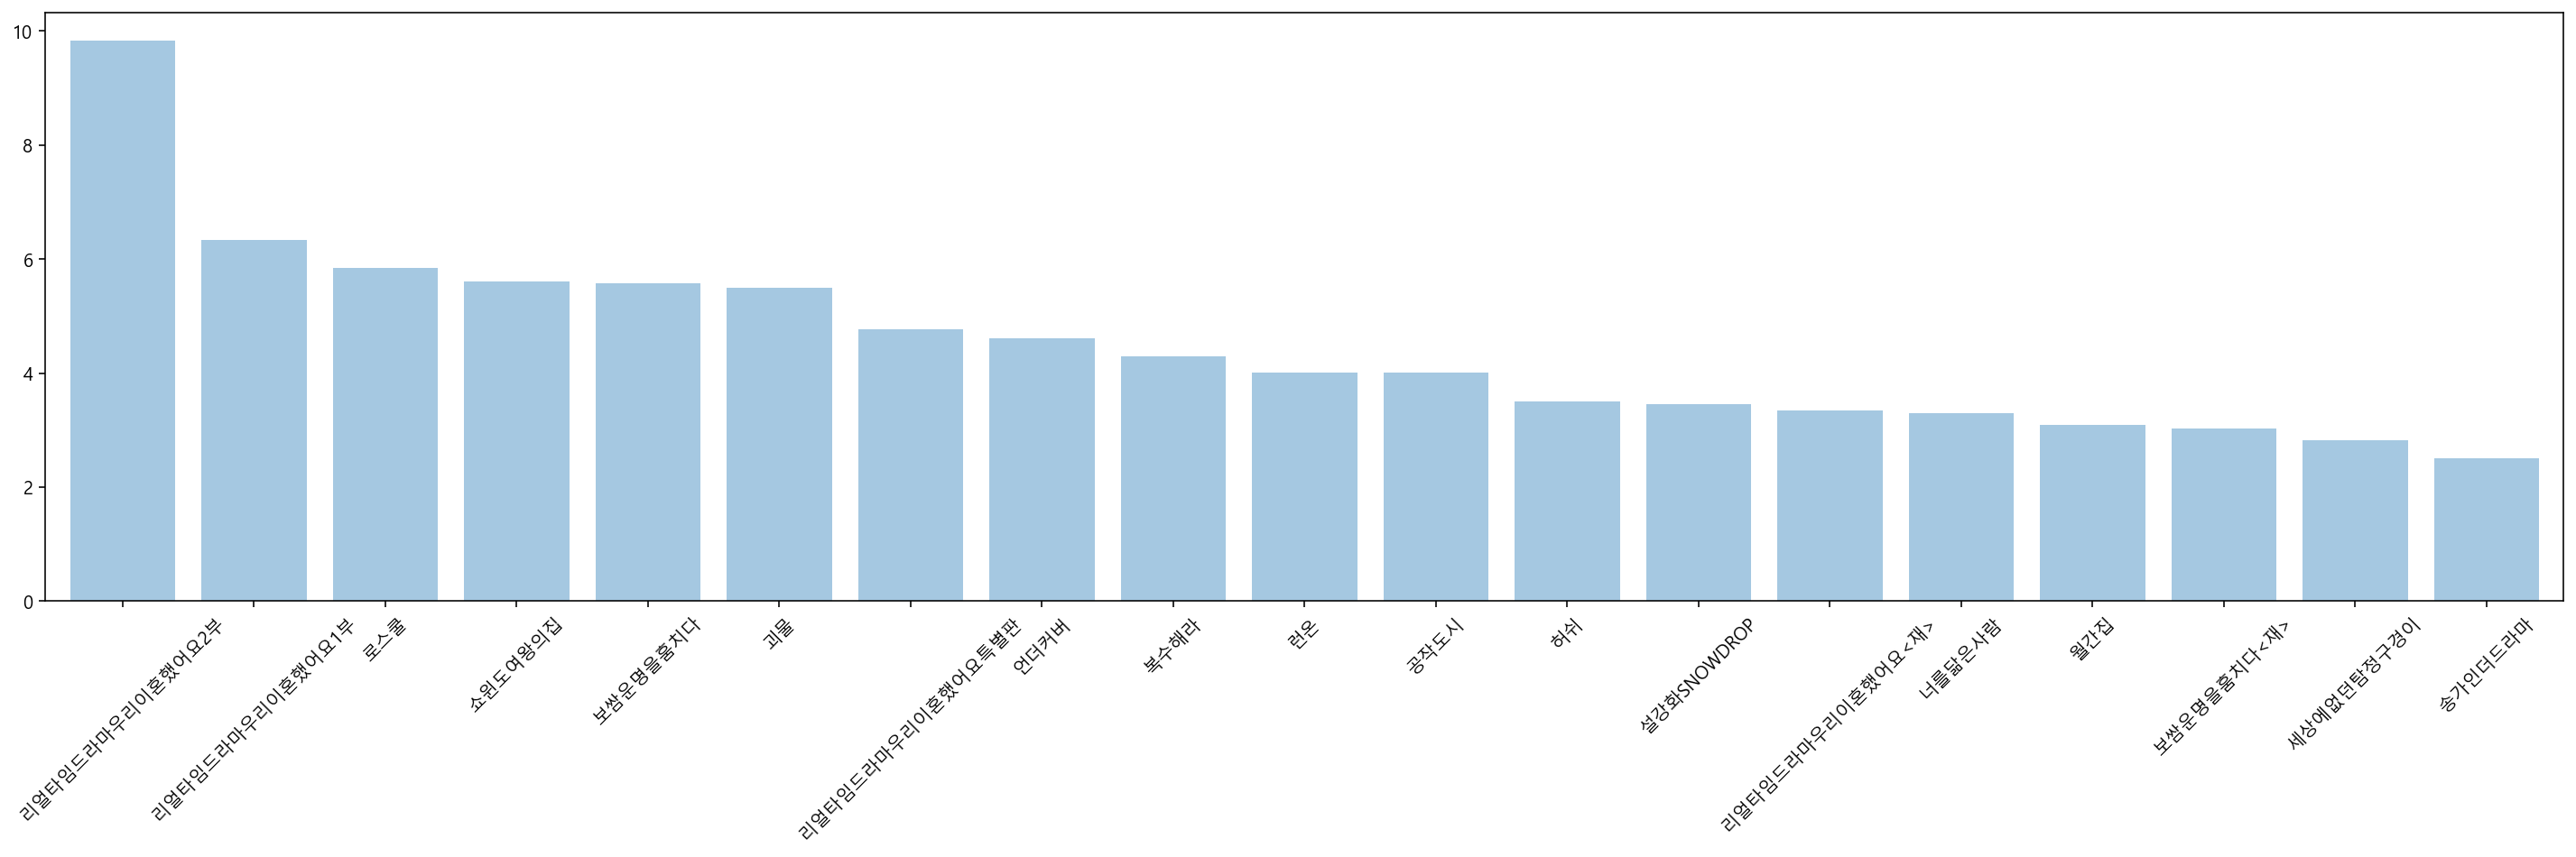

In [108]:
df_total_2021_percent_group_sum = df_total_2021_percent_drama['시청률'].groupby(df_total_2021_percent_drama['프로그램명']).mean().sort_values(ascending = False)

plt.figure(figsize=(25,6))
plt.bar(df_total_2021_percent_group_sum.index, df_total_2021_percent_group_sum.values, alpha=0.4)
plt.xticks(rotation=45)

ax = plt.subplot()
ax.margins(x=0.01)

plt.show()

In [109]:
df_total_2021_percent_group_sum.head(20)

프로그램명
리얼타임드라마우리이혼했어요2부     9.831000
리얼타임드라마우리이혼했어요1부     6.337286
로스쿨                  5.839812
쇼윈도여왕의집              5.605429
보쌈운명을훔치다             5.580737
괴물                   5.500000
리얼타임드라마우리이혼했어요특별판    4.763000
언더커버                 4.614187
복수해라                 4.296000
런온                   4.013857
공작도시                 4.002125
허쉬                   3.495600
설강화SNOWDROP          3.461000
리얼타임드라마우리이혼했어요<재>    3.338000
너를닮은사람               3.296857
월간집                  3.097000
보쌈운명을훔치다<재>          3.030750
세상에없던탐정구경이           2.815625
송가인더드라마              2.509000
Name: 시청률, dtype: float64

In [110]:
df_total_2021_count_drama = df_total_2021_count[df_total_2021_count['프로그램명'].str.contains('드라마')]
df_total_2021_count_drama = df_total_2021_count_drama.reset_index(drop=True)
df_total_2021_count_drama

,프로그램명,시점,시청자수
0,리얼타임드라마우리이혼했어요특별판,202112,410
1,리얼타임드라마우리이혼했어요2부,202114,"1,134"
2,리얼타임드라마우리이혼했어요1부,202114,549
3,수목드라마(런온),202116,407
4,수목드라마(런온),202117,562
...,...,...,...
190,토일드라마(설강화SNOWDROP),20211226,296
191,채널A특별기획월화드라마(쇼윈도여왕의집),20211227,606
192,채널A특별기획월화드라마(쇼윈도여왕의집),20211228,570
193,수목드라마(공작도시),20211229,378


In [111]:
true_lst = []
v = df_total_2021_count_drama.프로그램명.str.contains('\(')

for i in range(195):
    if v[i] == True:
        true = df_total_2021_count_drama.프로그램명[i]
        true = true.split('(')[1]
        true = true.strip(')')
        true_lst.append(true)
    else:
        true = df_total_2021_count_drama.프로그램명[i]
        true_lst.append(true)
true_lst

['리얼타임드라마우리이혼했어요특별판',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '런온',
 '런온',
 '허쉬',
 '허쉬',
 '리얼타임드라마우리이혼했어요특별판',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '런온',
 '런온',
 '허쉬',
 '허쉬',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '런온',
 '런온',
 '허쉬',
 '리얼타임드라마우리이혼했어요<재>',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '선배그립스틱바르지마요',
 '선배그립스틱바르지마요',
 '런온',
 '허쉬',
 '허쉬',
 '리얼타임드라마우리이혼했어요<재>',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '런온',
 '런온',
 '허쉬',
 '리얼타임드라마우리이혼했어요<재>',
 '허쉬',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '선배그립스틱바르지마요',
 '리얼타임드라마우리이혼했어요2부',
 '리얼타임드라마우리이혼했어요1부',
 '선배그립스틱바르지마요',
 '괴물',
 '괴물',
 '리얼타임드라마우리이혼했어요<재>',
 '선배그립스틱바르지마요',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '경로를이탈하였습니다',
 '괴물',
 '괴물',
 '아이를찾습니다',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '괴물',
 '로스쿨',
 '로스쿨',
 '로스쿨',
 '로스쿨',
 '언더커버',
 '언더커버',
 '로스쿨',
 '로스쿨',
 '언더커버',
 '언더커버',
 '보쌈운명을훔치다',
 '보쌈운명을훔치다',
 '로스쿨',
 '로스쿨',
 '언더커버',
 '언더커버',
 '보쌈운명을훔치다',
 '보쌈운명을훔치다',
 '보쌈운명을훔치다',
 '보쌈운명을훔치다',
 '보쌈운명을훔치다<재>',
 '로스쿨',
 '언더커버',


In [ ]:
df_total_2021_count_drama['프로그램명'] = true_lst
df_total_2021_count_drama

In [ ]:
name = set(df_total_2021_count_drama['프로그램명'])
len(name)

In [ ]:
df_total_2021_count_drama.info()

In [ ]:
df_total_2021_count_drama['시청자수'] = df_total_2021_count_drama.시청자수.str.replace(",", "")

In [ ]:
df_total_2021_count_drama['시청자수'] = df_total_2021_count_drama['시청자수'].astype('int')

In [ ]:
df_total_2021_count_group = df_total_2021_count_drama.groupby(['프로그램명','시점']).mean()
df_total_2021_count_group

In [ ]:
df_total_2021_count_group_sum = df_total_2021_count_drama['시청자수'].groupby(df_total_2021_count_drama['프로그램명']).mean().sort_values(ascending = False)

plt.figure(figsize=(25,6))
plt.bar(df_total_2021_count_group_sum.index, df_total_2021_count_group_sum.values)
plt.xticks(rotation=45)

ax = plt.subplot()
ax.margins(x=0.01)

plt.show()

In [ ]:
df_total_2021_count_group_sum.head(20)

## Top 20위 드라마 분석
1. 리얼타임드라마우리이혼했어요2부
2. 괴물 -> O
3. 로스쿨 -> O
4. 리얼타임드라마우리이혼했어요1부
5. 보쌈운명을훔치다 -> X
6. 쇼윈도여왕의집 -> X
7. 런온 -> O
8. 언더커버 -> X
9. 리얼타임드라마우리이혼했어요특별판
10. 공작도시 -> 2021.12. - 2022.2
11. 설강화SNOWDROP -> X
12. 허쉬 -> X
13. 선배그립스틱바르지마요 -> O
14. 리얼타임드라마우리이혼했어요<재>
15. 세상에없던탐정구경이 -> O
16. 너를닮은사람 -> O
17. 월간집 -> O
18. 한사람만 -> 2022
19. 경로를이탈하였습니다 -> X
20. 송가인더드라마
